# 1. Estimation of Obesity Levels

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import time

from collections import Counter
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Start script run time
script_start_time = time.time()

In [3]:
def run_time(start_time):
  """
  Calculate run time (hours, minutes, seconds)
  start_time - Start time of script/model
  """

  # End time
  end_time = time.time()

  # Compute run time (hours, minutes, seconds)
  hours = int((end_time - start_time) / 3600)
  minutes = int(((end_time - start_time) % 3600) / 60)
  seconds = int(((end_time - start_time) % 3600) % 60)

  return hours, minutes, seconds

## 2. Data Preprocessing

### 2.1. Load Data

In [4]:
try:
  # Load dataframe (df) into appropriate format
  dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
  print("Data loaded successfully.")
except:
  # No data found
  print("Data not found. Please try again.")
  sys.exit()

Data loaded successfully.


### 2.2. Inital Preprocessing

In [5]:
dataset

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [6]:
# Brief info about dataframe - non-null values and datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
# Check for duplicate records
dataset.duplicated().sum()

np.int64(24)

In [8]:
# Check for missing values
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# dataset = dataset.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(dataset)
# dataset = imputer.transform(dataset)

# dataset.isnull().sum()

In [10]:
# Re-organize dataframe
dataset = dataset[['Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad']]

In [11]:
# Dataframe statistics on quantitative (numerical) values
dataset.describe(include='all')

Gender          Age       Height       Weight  \
count    2111  2111.000000  2111.000000  2111.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.312600     1.701677    86.586058   
std       NaN     6.345968     0.093305    26.191172   
min       NaN    14.000000     1.450000    39.000000   
25%       NaN    19.947192     1.630000    65.473343   
50%       NaN    22.777890     1.700499    83.000000   
75%       NaN    26.000000     1.768464   107.430682   
max       NaN    61.000000     1.980000   173.000000   

       family_history_with_overweight  FAVC         FCVC          NCP  \
count                            2111  2111  2111.000000  2111.000000   
unique                              2     2          NaN          NaN   
top                               yes   yes          NaN          NaN   
freq                             1726  1866          NaN          NaN   
mean                              NaN   NaN     2.419043     2.685628   
std                               NaN   NaN     0.533927     0.778039   
min                               NaN   NaN     1.000000     1.000000   
25%                               NaN   NaN     2.000000     2.658738   
50%                               NaN   NaN     2.385502     3.000000   
75%                               NaN   NaN     3.000000     3.000000   
max                               NaN   NaN     3.000000     4.000000   

             CAEC SMOKE         CH2O   SCC          FAF          TUE  \
count        2111  2111  2111.000000  2111  2111.000000  2111.000000   
unique          4     2          NaN     2          NaN          NaN   
top     Sometimes    no          NaN    no          NaN          NaN   
freq         1765  2067          NaN  2015          NaN          NaN   
mean          NaN   NaN     2.008011   NaN     1.010298     0.657866   
std           NaN   NaN     0.612953   NaN     0.850592     0.608927   
min           NaN   NaN     1.000000   NaN     0.000000     0.000000   
25%           NaN   NaN     1.584812   NaN     0.124505     0.000000   
50%           NaN   NaN     2.000000   NaN     1.000000     0.625350   
75%           NaN   NaN     2.477420   NaN     1.666678     1.000000   
max           NaN   NaN     3.000000   NaN     3.000000     2.000000   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351  
mean          NaN                    NaN             NaN  
std           NaN                    NaN             NaN  
min           NaN                    NaN             NaN  
25%           NaN                    NaN             NaN  
50%           NaN                    NaN             NaN  
75%           NaN                    NaN             NaN  
max           NaN                    NaN             NaN

In [12]:
# Female only
dataset[dataset['Gender'] == 'Female'].describe(include='all')

Gender          Age       Height       Weight  \
count     1043  1043.000000  1043.000000  1043.000000   
unique       1          NaN          NaN          NaN   
top     Female          NaN          NaN          NaN   
freq      1043          NaN          NaN          NaN   
mean       NaN    24.001907     1.643298    82.302364   
std        NaN     6.407832     0.074509    29.723904   
min        NaN    15.000000     1.450000    39.000000   
25%        NaN    19.627721     1.596526    58.000000   
50%        NaN    22.000000     1.639524    78.000000   
75%        NaN    26.000000     1.699516   105.036863   
max        NaN    61.000000     1.843419   165.057269   

       family_history_with_overweight  FAVC         FCVC          NCP  \
count                            1043  1043  1043.000000  1043.000000   
unique                              2     2          NaN          NaN   
top                               yes   yes          NaN          NaN   
freq                              811   900          NaN          NaN   
mean                              NaN   NaN     2.567319     2.632419   
std                               NaN   NaN     0.548079     0.816352   
min                               NaN   NaN     1.000000     1.000000   
25%                               NaN   NaN     2.000000     2.663175   
50%                               NaN   NaN     2.964419     3.000000   
75%                               NaN   NaN     3.000000     3.000000   
max                               NaN   NaN     3.000000     4.000000   

             CAEC SMOKE         CH2O   SCC          FAF          TUE  \
count        1043  1043  1043.000000  1043  1043.000000  1043.000000   
unique          4     2          NaN     2          NaN          NaN   
top     Sometimes    no          NaN    no          NaN          NaN   
freq          844  1028          NaN   973          NaN          NaN   
mean          NaN   NaN     1.941083   NaN     0.847137     0.647227   
std           NaN   NaN     0.634037   NaN     0.840443     0.572016   
min           NaN   NaN     1.000000   NaN     0.000000     0.000000   
25%           NaN   NaN     1.383862   NaN     0.000000     0.000000   
50%           NaN   NaN     2.000000   NaN     0.742113     0.655558   
75%           NaN   NaN     2.485002   NaN     1.507336     1.000000   
max           NaN   NaN     3.000000   NaN     3.000000     2.000000   

             CALC                 MTRANS        NObeyesdad  
count        1043                   1043              1043  
unique          3                      4                 7  
top     Sometimes  Public_Transportation  Obesity_Type_III  
freq          711                    854               323  
mean          NaN                    NaN               NaN  
std           NaN                    NaN               NaN  
min           NaN                    NaN               NaN  
25%           NaN                    NaN               NaN  
50%           NaN                    NaN               NaN  
75%           NaN                    NaN               NaN  
max           NaN                    NaN               NaN

In [13]:
# Male only
dataset[dataset['Gender'] == 'Male'].describe(include='all')

Gender          Age       Height       Weight  \
count    1068  1068.000000  1068.000000  1068.000000   
unique      1          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.616020     1.758690    90.769478   
std       NaN     6.273121     0.072174    21.407030   
min       NaN    14.000000     1.560000    45.000000   
25%       NaN    20.000000     1.705205    75.000000   
50%       NaN    23.000000     1.760000    89.945470   
75%       NaN    27.933529     1.807382   108.460518   
max       NaN    56.000000     1.980000   173.000000   

       family_history_with_overweight  FAVC         FCVC          NCP  \
count                            1068  1068  1068.000000  1068.000000   
unique                              2     2          NaN          NaN   
top                               yes   yes          NaN          NaN   
freq                              915   966          NaN          NaN   
mean                              NaN   NaN     2.274238     2.737592   
std                               NaN   NaN     0.477400     0.735382   
min                               NaN   NaN     1.000000     1.000000   
25%                               NaN   NaN     2.000000     2.658747   
50%                               NaN   NaN     2.032064     3.000000   
75%                               NaN   NaN     2.737235     3.000000   
max                               NaN   NaN     3.000000     4.000000   

             CAEC SMOKE         CH2O   SCC          FAF          TUE  \
count        1068  1068  1068.000000  1068  1068.000000  1068.000000   
unique          4     2          NaN     2          NaN          NaN   
top     Sometimes    no          NaN    no          NaN          NaN   
freq          921  1039          NaN  1042          NaN          NaN   
mean          NaN   NaN     2.073373   NaN     1.169639     0.668256   
std           NaN   NaN     0.584581   NaN     0.830368     0.643032   
min           NaN   NaN     1.000000   NaN     0.000000     0.000000   
25%           NaN   NaN     1.880571   NaN     0.582555     0.000000   
50%           NaN   NaN     2.000000   NaN     1.000000     0.601865   
75%           NaN   NaN     2.464554   NaN     1.927013     1.000000   
max           NaN   NaN     3.000000   NaN     3.000000     2.000000   

             CALC                 MTRANS       NObeyesdad  
count        1068                   1068             1068  
unique          4                      5                7  
top     Sometimes  Public_Transportation  Obesity_Type_II  
freq          690                    726              295  
mean          NaN                    NaN              NaN  
std           NaN                    NaN              NaN  
min           NaN                    NaN              NaN  
25%           NaN                    NaN              NaN  
50%           NaN                    NaN              NaN  
75%           NaN                    NaN              NaN  
max           NaN                    NaN              NaN

## 3. Initial Exploratory Data Analysis (EDA)

In [14]:
# Significance value (alpha) for hypothesis testing
alpha = 0.05

In [15]:
def t_test(a, b, alpha=0.05):
  """
  Perform a two-sample Student's t-Test for Groups a and b
  a     - Group a
  b     - Group b
  alpha - Significance level (e.g: 0.05 -> 0.95 or 95% confidence level)
  """

  # Perform a two-sample t-test
  stat, p = ttest_ind(a, b, equal_var=False, alternative='two-sided')
  print('t-value=%.3f, p-value=%.3f, significance level=%.2f' % (stat, p, alpha))
  # Interpret results
  if (p < alpha):
      print('Reject Null Hypothesis (H0)')
  else:
      print('Fail to Reject Null Hypothesis (H0)')

#### Pairwise relationships between features - Numerical data

<Figure size 300x300 with 0 Axes>

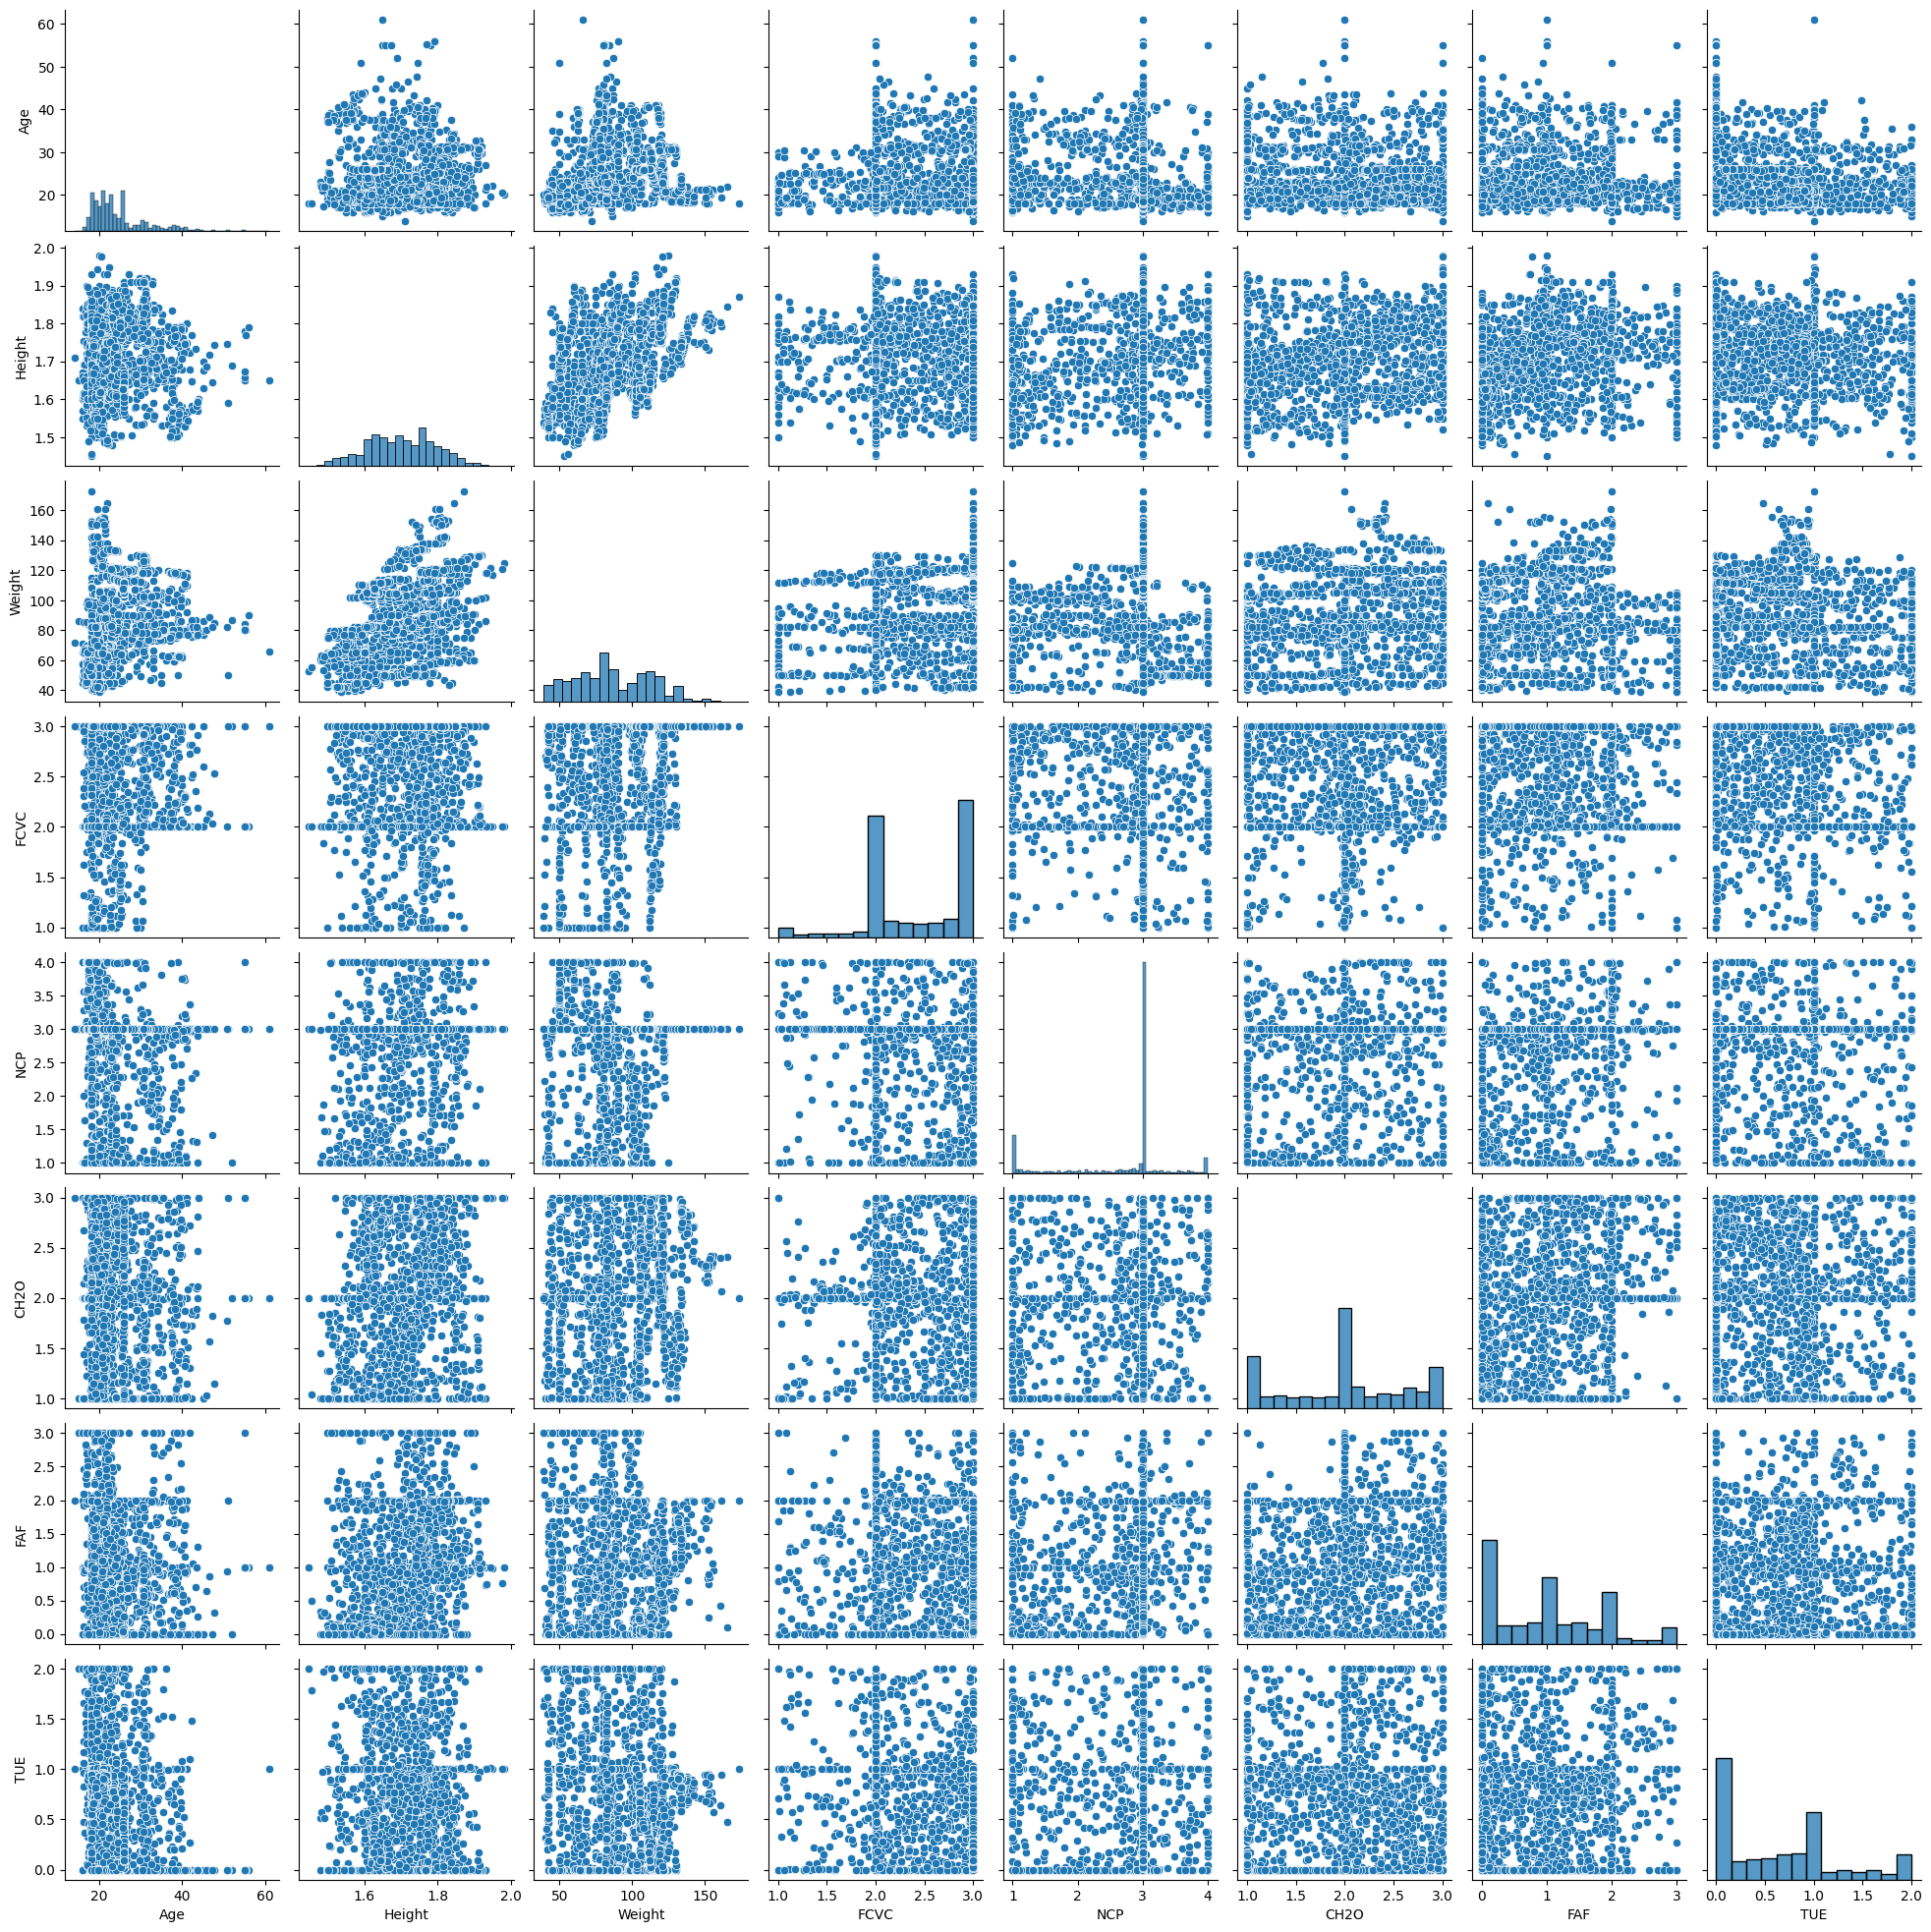

In [16]:
# Define pairplot
plt.figure(figsize=(3,3))

# Pairwise distributions
sns.pairplot(dataset)

# Show figure
plt.show()

<Figure size 300x300 with 0 Axes>

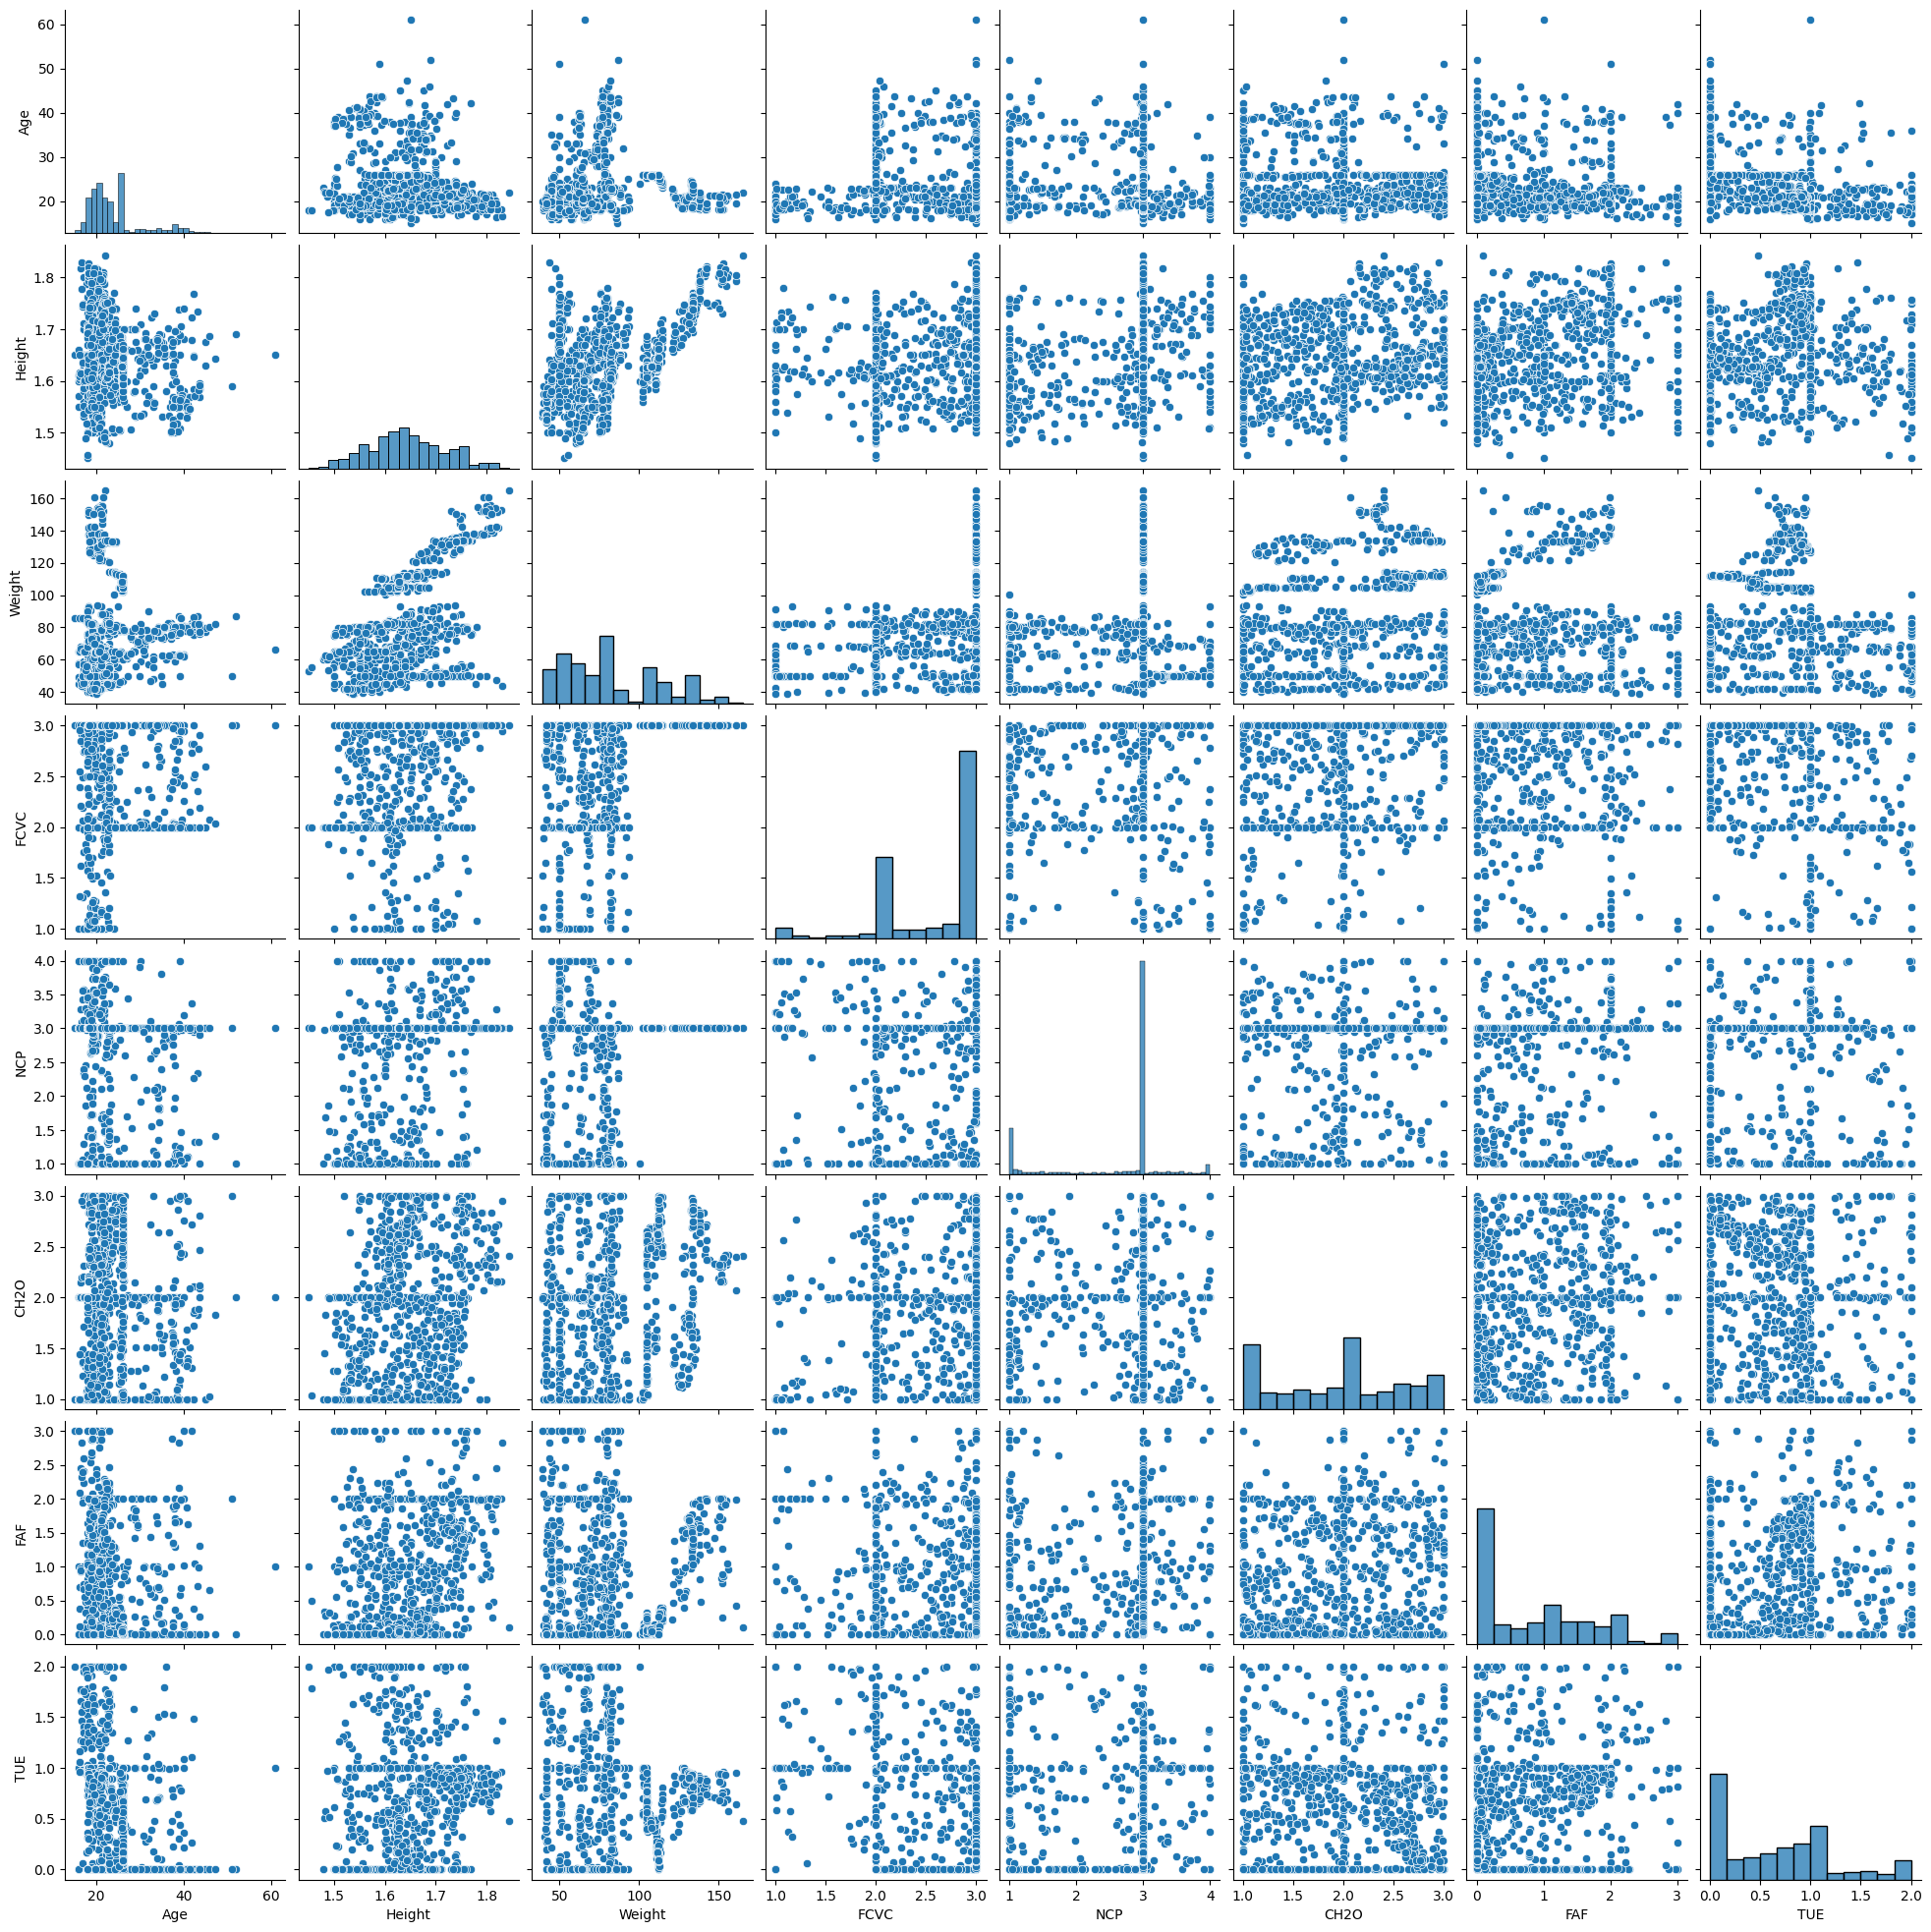

In [17]:
# Define pairplot
plt.figure(figsize=(3,3))

# Pairwise distributions - Female only
sns.pairplot(dataset[dataset['Gender'] == 'Female'])

# Show figure
plt.show()

<Figure size 300x300 with 0 Axes>

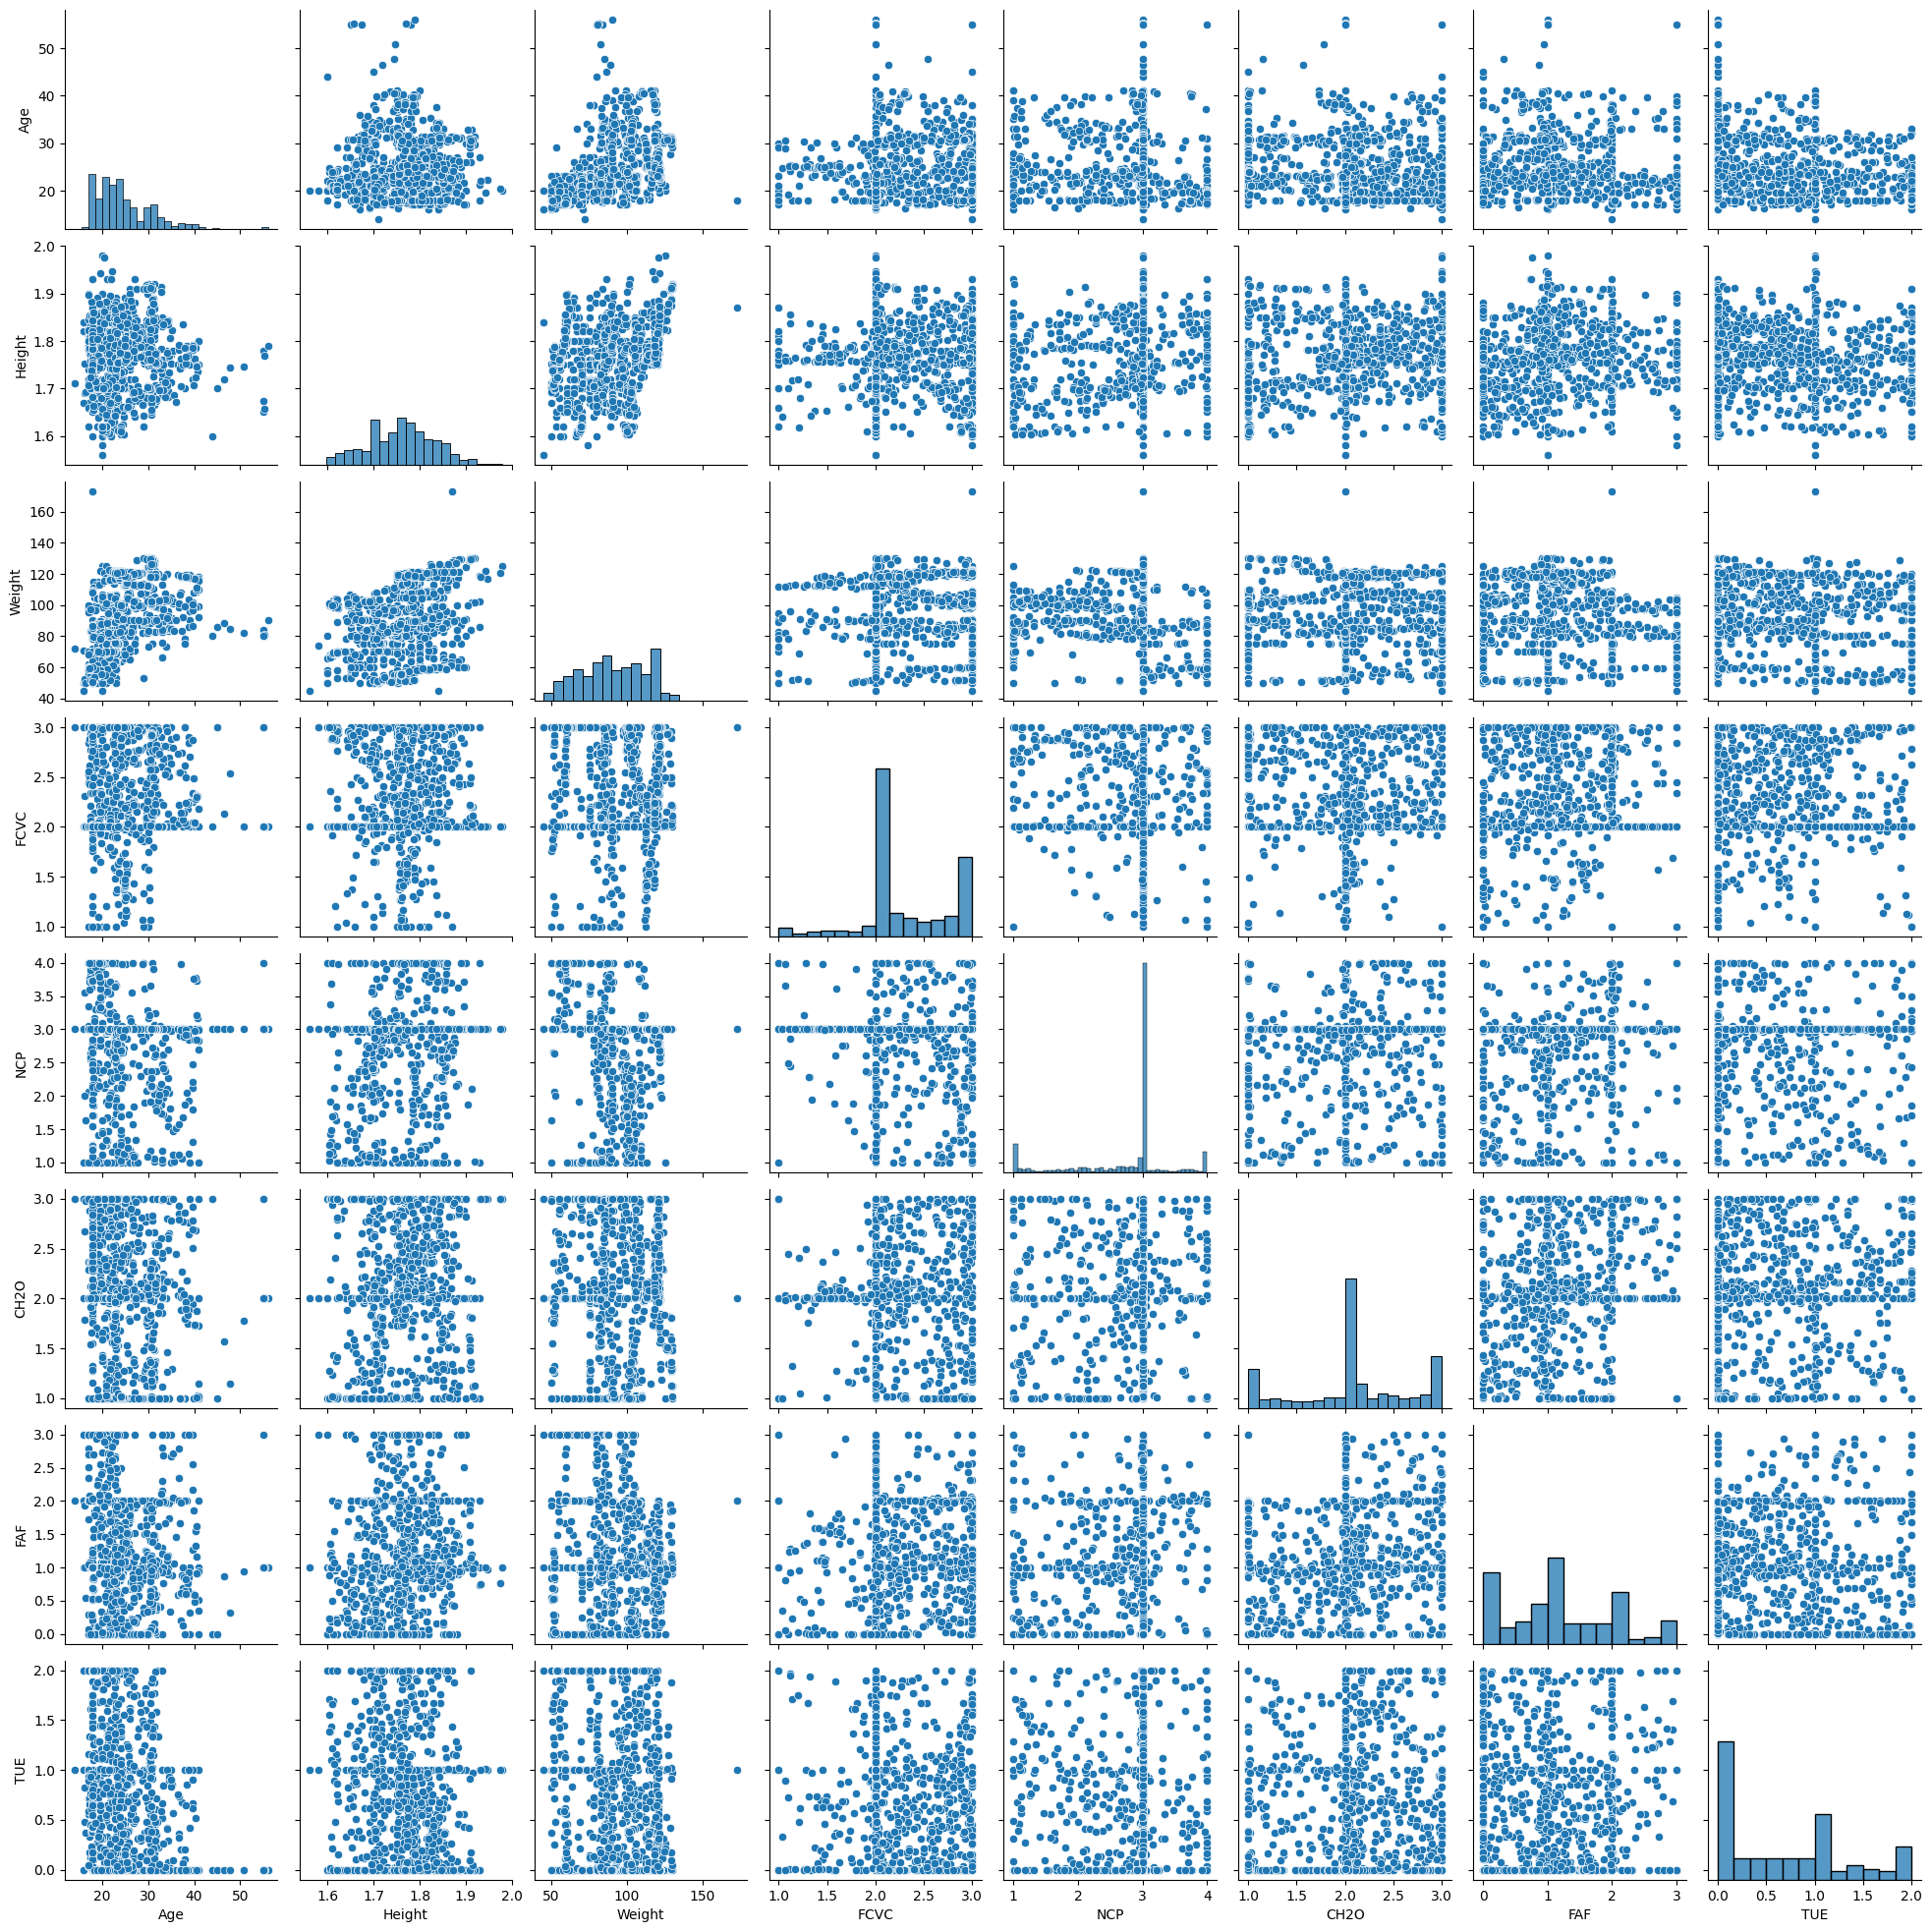

In [18]:
# Define pairplot
plt.figure(figsize=(3,3))

# Pairwise distributions - Male only
sns.pairplot(dataset[dataset['Gender'] == 'Male'])

# Show figure
plt.show()

#### Correlation Map - Numerical data

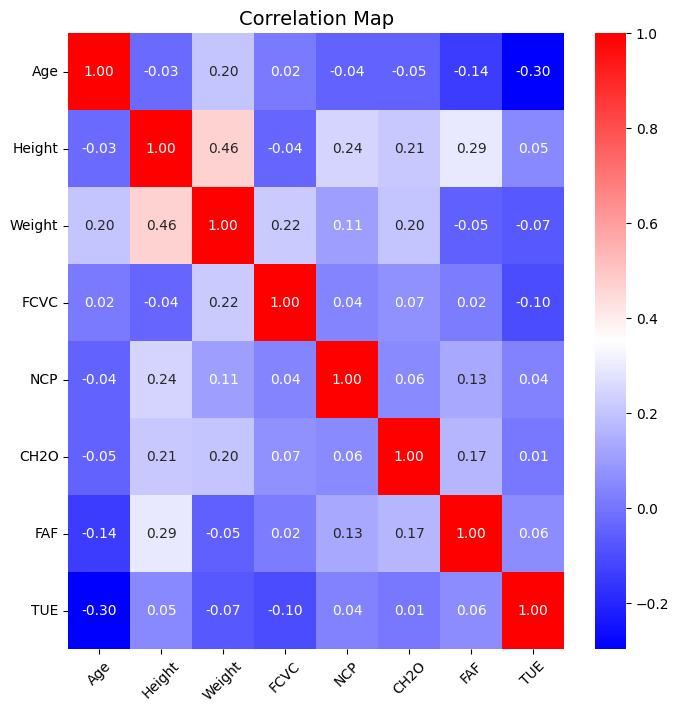

In [19]:
# Define correlation map figure
plt.figure(figsize=(8,8))

# Correlation Map
sns.heatmap(dataset[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr(),
            cmap='bwr', annot=True, fmt = ".2f")
# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map', fontsize=14)

# Show figure
plt.show()

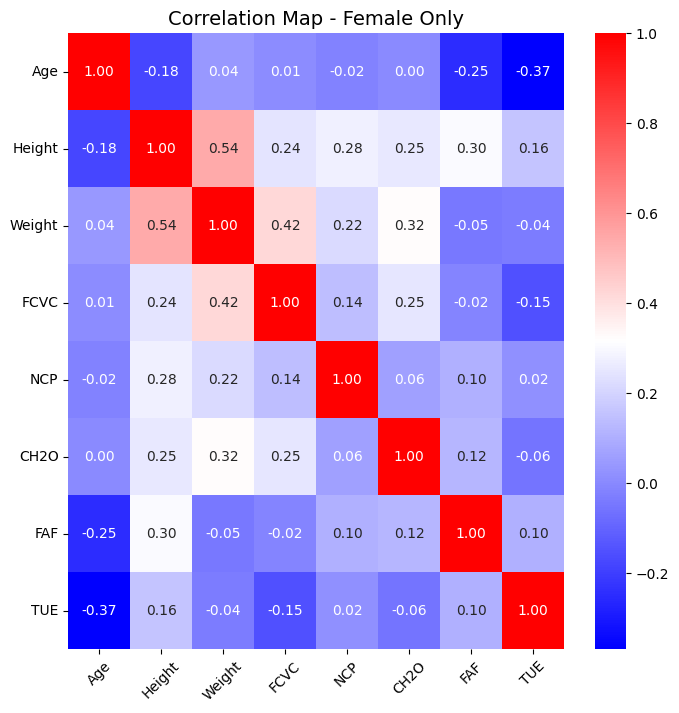

In [20]:
# Define correlation map figure
plt.figure(figsize=(8,8))

# Correlation Map - Female only
sns.heatmap(dataset[dataset['Gender'] == 'Female'][['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr(),
            cmap='bwr', annot=True, fmt = ".2f")
# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map - Female Only', fontsize=14)

# Show figure
plt.show()

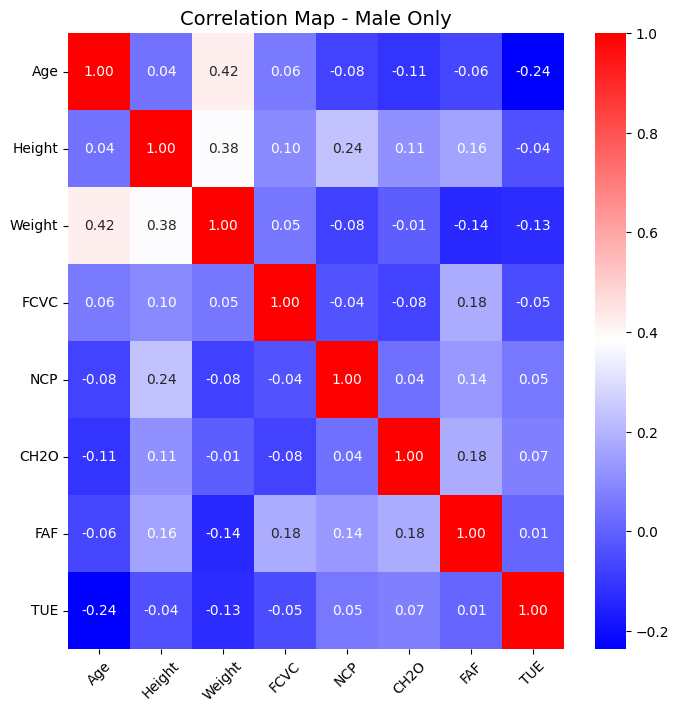

In [21]:
# Define correlation map figure
plt.figure(figsize=(8,8))

# Correlation Map - Male only
sns.heatmap(dataset[dataset['Gender'] == 'Male'][['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr(),
            cmap='bwr', annot=True, fmt = ".2f")
# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map - Male Only', fontsize=14)

# Show figure
plt.show()

#### Number of Records per Gender

/tmp/ipython-input-2126578164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  gender_dist = sns.countplot(data=dataset, x='Gender', palette='tab10')


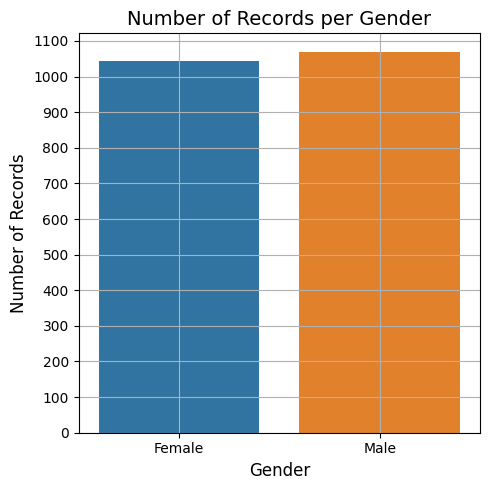

In [22]:
# Define figure
plt.figure(figsize=(5,5))

# Plot gender distribution - histogram
gender_dist = sns.countplot(data=dataset, x='Gender', palette='tab10')

# Adjust X and Y-Axes
plt.yticks(np.arange(0, 1200, 100))
# Plot title and axes labels
plt.title('Number of Records per Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

#### Age Distribution

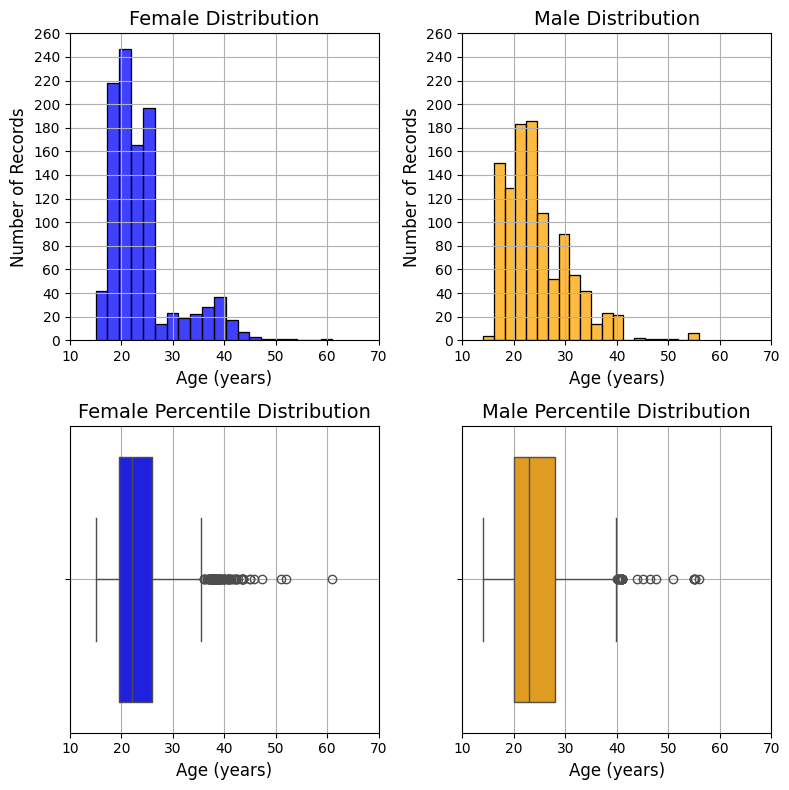

In [23]:
# Define subplot figure
gender_dist_1 = plt.figure(figsize=(8,8))

# Histogram - Female
ax1 = gender_dist_1.add_subplot(2, 2, 1)
ax1 = sns.histplot(data=dataset[dataset['Gender'] == 'Female'], x='Age', bins=20,
                   color='blue')
# Adjust axes range(s)
plt.xticks(np.arange(10, 80, 10))
plt.yticks(np.arange(0, 280, 20))
# Plot title and label(s)
plt.title('Female Distribution', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot grid
plt.grid(True)

# Histogram - Male
ax2 = gender_dist_1.add_subplot(2, 2, 2)
ax2 = sns.histplot(data=dataset[dataset['Gender'] == 'Male'], x='Age', bins=20,
                   color='orange')
# Adjust axes range(s)
plt.xticks(np.arange(10, 80, 10))
plt.yticks(np.arange(0, 280, 20))
# Plot title and label(s)
plt.title('Male Distribution', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot grid
plt.grid(True)

# Box plot - Female
ax3 = gender_dist_1.add_subplot(2, 2, 3)
ax3 = sns.boxplot(data=dataset[dataset['Gender'] == 'Female'], x='Age', color='blue')
# Adjust axes range(s)
plt.xticks(np.arange(10, 80, 10))
# Plot title and label(s)
plt.xlabel('Age (years)', fontsize=12)
plt.title('Female Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Box plot - Male
ax4 = gender_dist_1.add_subplot(2, 2, 4)
ax4 = sns.boxplot(data=dataset[dataset['Gender'] == 'Male'], x='Age', color='orange')
# Adjust axes range(s)
plt.xticks(np.arange(10, 80, 10))
# Plot title and label(s)
plt.title('Male Percentile Distribution', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)
# Plot grid
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

In [24]:
# Two-sample t-test, Age distribution (Female vs. Male)

# Null and Alternative hypotheses:
print("Null Hypothesis (H0)       : No significant difference in average age between genders.")
print("Alternative Hypothesis (H1): There is a significant difference in average age between genders.")
print("")

# Perform the two-sample t-test
t_test(dataset[dataset['Gender'] == 'Female']['Age'],
       dataset[dataset['Gender'] == 'Male']['Age'],
       alpha)

Null Hypothesis (H0)       : No significant difference in average age between genders.
Alternative Hypothesis (H1): There is a significant difference in average age between genders.

t-value=-2.224, p-value=0.026, significance level=0.05
Reject Null Hypothesis (H0)


#### Height distribution

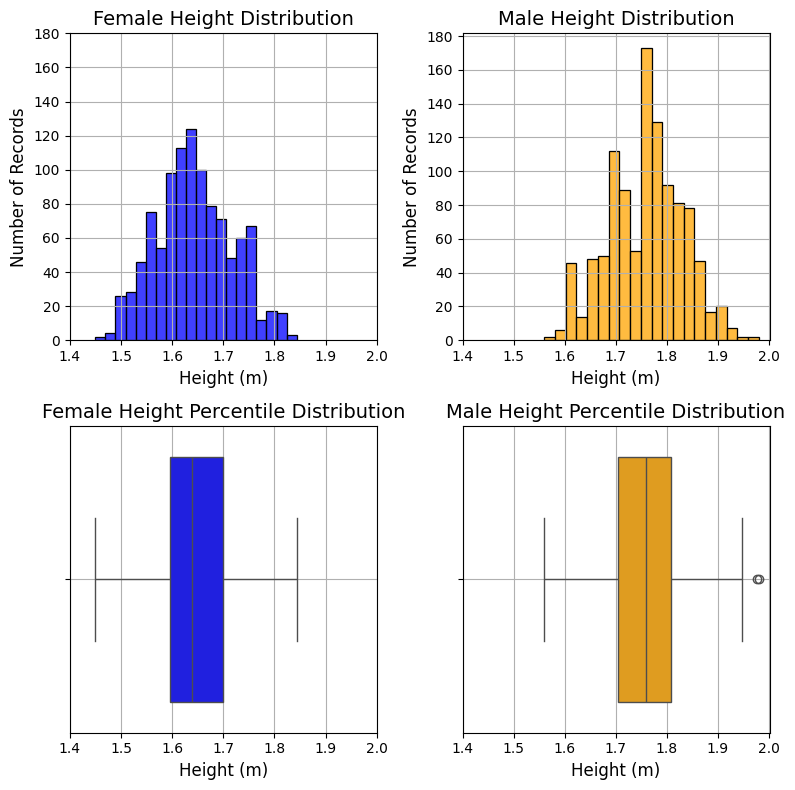

In [25]:
# Define subplot figure
height_dist_1 = plt.figure(figsize=(8,8))

# Histogram - Female Height
ax1 = height_dist_1.add_subplot(2, 2, 1)
ax1 = sns.histplot(data=dataset[dataset['Gender'] == 'Female'], x='Height', bins=20,
                   color='blue')
# Adjust axes range(s)
plt.xticks(np.arange(1.4, 2.0, 0.1))
plt.yticks(np.arange(0, 200, 20))
# Plot title and label(s)
plt.title('Female Height Distribution', fontsize=14)
plt.xlabel('Height (m)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot grid
plt.grid(True)

# Histogram - Male Height
ax2 = height_dist_1.add_subplot(2, 2, 2)
ax2 = sns.histplot(data=dataset[dataset['Gender'] == 'Male'], x='Height', bins=20,
                   color='orange')
# Adjust axes range(s)
plt.xticks(np.arange(1.4, 2.0, 0.1))
plt.yticks(np.arange(0, 200, 20))
# Plot title and label(s)
plt.title('Male Height Distribution', fontsize=14)
plt.xlabel('Height (m)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot grid
plt.grid(True)

# Box plot - Female Height
ax3 = height_dist_1.add_subplot(2, 2, 3)
ax3 = sns.boxplot(data=dataset[dataset['Gender'] == 'Female'], x='Height', color='blue')
# Adjust axes range(s)
plt.xticks(np.arange(1.4, 2.0, 0.1))
# Plot title and label(s)
plt.title('Female Height Percentile Distribution', fontsize=14)
plt.xlabel('Height (m)', fontsize=12)
# Plot grid
plt.grid(True)

# Box plot - Male Height
ax4 = height_dist_1.add_subplot(2, 2, 4)
ax4 = sns.boxplot(data=dataset[dataset['Gender'] == 'Male'], x='Height', color='orange')
# Adjust axes range(s)
plt.xticks(np.arange(1.4, 2.0, 0.1))
# Plot title and label(s)
plt.title('Male Height Percentile Distribution', fontsize=14)
plt.xlabel('Height (m)', fontsize=12)
# Plot grid
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

In [26]:
# Two-sample t-test, Height distribution (Female vs. Male)

# Null and Alternative hypotheses:
print("Null Hypothesis (H0)       : No significant difference in average height between genders.")
print("Alternative Hypothesis (H1): There is a significant difference in average height between genders.")
print("")

# Perform the two-sample t-test
t_test(dataset[dataset['Gender'] == 'Female']['Height'],
       dataset[dataset['Gender'] == 'Male']['Height'],
       alpha)

Null Hypothesis (H0)       : No significant difference in average height between genders.
Alternative Hypothesis (H1): There is a significant difference in average height between genders.

t-value=-36.130, p-value=0.000, significance level=0.05
Reject Null Hypothesis (H0)


#### Weight distribution

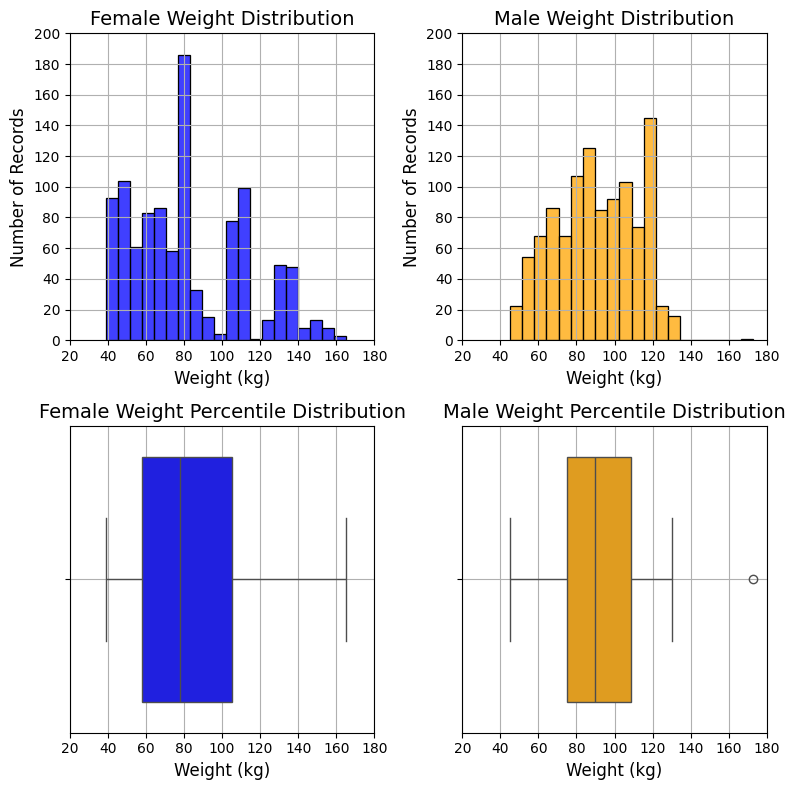

In [27]:
# Define subplot figure
weight_dist_1 = plt.figure(figsize=(8,8))

# Histogram - Female Weight
ax1 = weight_dist_1.add_subplot(2, 2, 1)
ax1 = sns.histplot(data=dataset[dataset['Gender'] == 'Female'], x='Weight', bins=20,
                   color='blue')
# Adjust axes range(s)
plt.xticks(np.arange(20, 200, 20))
plt.yticks(np.arange(0, 220, 20))
# Plot title and label(s)
plt.title('Female Weight Distribution', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot grid
plt.grid(True)

# Histogram - Male Weight
ax2 = weight_dist_1.add_subplot(2, 2, 2)
ax2 = sns.histplot(data=dataset[dataset['Gender'] == 'Male'], x='Weight', bins=20,
                   color='orange')
# Adjust axes range(s)
plt.xticks(np.arange(20, 200, 20))
plt.yticks(np.arange(0, 220, 20))
# Plot title and label(s)
plt.title('Male Weight Distribution', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot grid
plt.grid(True)

# Box plot - Female Weight
ax3 = weight_dist_1.add_subplot(2, 2, 3)
ax3 = sns.boxplot(data=dataset[dataset['Gender'] == 'Female'], x='Weight', color='blue')
# Adjust axes range(s)
plt.xticks(np.arange(20, 200, 20))
# Plot title and label(s)
plt.title('Female Weight Percentile Distribution', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
# Plot grid
plt.grid(True)

# Box plot - Male Weight
ax4 = weight_dist_1.add_subplot(2, 2, 4)
ax4 = sns.boxplot(data=dataset[dataset['Gender'] == 'Male'], x='Weight', color='orange')
# Adjust axes range(s)
plt.xticks(np.arange(20, 200, 20))
# Plot title and label(s)
plt.title('Male Weight Percentile Distribution', fontsize=14)
plt.xlabel('Weight (kg)', fontsize=12)
# Plot grid
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

In [28]:
# Two-sample t-test, Weight distribution (Female vs. Male)

# Null and Alternative hypotheses:
print("Null Hypothesis (H0)       : No significant difference in average weight between genders.")
print("Alternative Hypothesis (H1): There is a significant difference in average weight between genders.")
print("")

# Perform the two-sample t-test
t_test(dataset[dataset['Gender'] == 'Female']['Weight'],
       dataset[dataset['Gender'] == 'Male']['Weight'],
       alpha)

Null Hypothesis (H0)       : No significant difference in average weight between genders.
Alternative Hypothesis (H1): There is a significant difference in average weight between genders.

t-value=-7.495, p-value=0.000, significance level=0.05
Reject Null Hypothesis (H0)


#### Has a family member suffered or suffers from overweight?

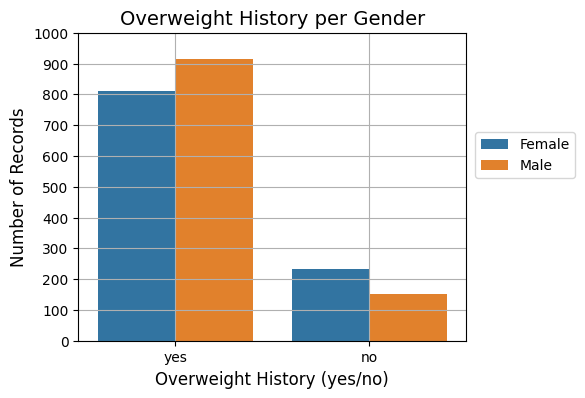

In [29]:
# Define subplot figure
overweight_hist_1 = plt.figure(figsize=(5, 4))

# Overweight History
overweight_hist_1 = sns.countplot(data=dataset, x='family_history_with_overweight',
                                  hue='Gender', palette='tab10')
# Adjust Y-Axis axes range(s)
plt.yticks(np.arange(0, 1100, 100))
# Plot title and label(s)
plt.title('Overweight History per Gender', fontsize=14)
plt.xlabel('Overweight History (yes/no)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.grid(True)

# Show figure
plt.show()

#### Do you eat high-caloric food frequently?

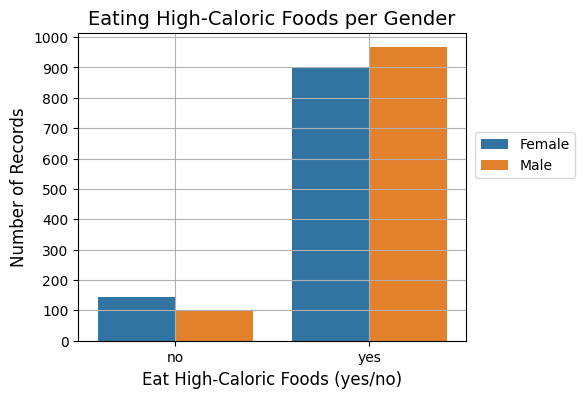

In [30]:
# Define subplot figure
high_cal_foods_1 = plt.figure(figsize=(5,4))

# Histogram for Female
high_cal_foods_1 = sns.countplot(data=dataset, x='FAVC', hue='Gender', palette='tab10')
# Adjust Y-Axis axes range(s)
plt.yticks(np.arange(0, 1100, 100))
# Plot title and label(s)
plt.title('Eating High-Caloric Foods per Gender', fontsize=14)
plt.xlabel('Eat High-Caloric Foods (yes/no)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.grid(True)

# Show figure
plt.show()

#### Do you usually eat vegetables in your meals?

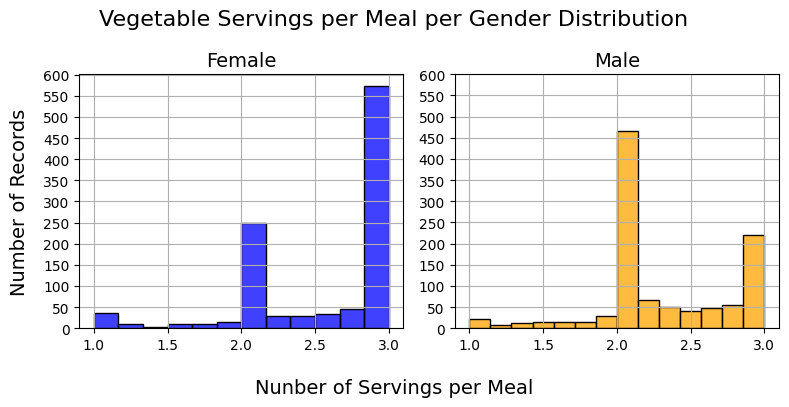

In [31]:
# Define subplot figure
eat_veggies_1 = plt.figure(figsize=(8,4))

eat_veggies_1.suptitle('Vegetable Servings per Meal per Gender Distribution', fontsize=16)
eat_veggies_1.supxlabel('Nunber of Servings per Meal', fontsize=14)
eat_veggies_1.supylabel('Number of Records', fontsize=14)

# Histogram for Female
ax1 = eat_veggies_1.add_subplot(1, 2, 1)
ax1 = sns.histplot(data=dataset[dataset['Gender'] == 'Female'], x='FCVC', color='blue')
# Adjust axes range(s)
plt.xticks(np.arange(1, 3.5, 0.5))
plt.yticks(np.arange(0, 650, 50))
# Plot title and label(s)
plt.title('Female', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
# Plot grid
plt.grid(True)

# Histogram for Male
ax2 = eat_veggies_1.add_subplot(1, 2, 2)
ax2 = sns.histplot(data=dataset[dataset['Gender'] == 'Male'], x='FCVC', color='orange')
# Adjust axes range(s)
plt.xticks(np.arange(1, 3.5, 0.5))
plt.yticks(np.arange(0, 650, 50))
# Plot title and label(s)
plt.title('Male', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
# Plot grid
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

#### Do you eat high caloric food frequently?

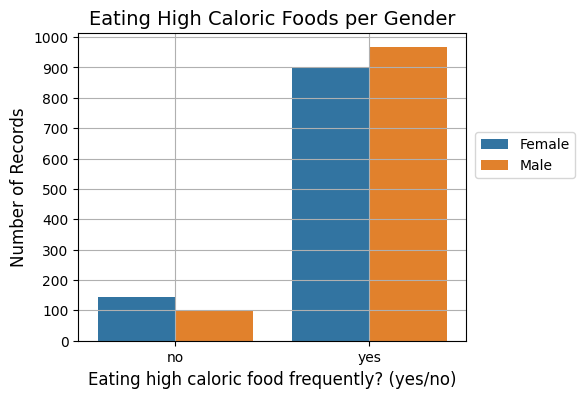

In [32]:
# Define subplot figure
high_cal_foods_1 = plt.figure(figsize=(5,4))

# Histogram for Female
high_cal_foods_1 = sns.countplot(data=dataset, x='FAVC', hue='Gender', palette='tab10')
# Adjust Y-Axis axes range(s)
plt.yticks(np.arange(0, 1100, 100))
# Plot title and label(s)
plt.title('Eating High Caloric Foods per Gender', fontsize=14)
plt.xlabel('Eating high caloric food frequently? (yes/no)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.grid(True)

# Show figure
plt.show()

#### Do you eat any food between meals?

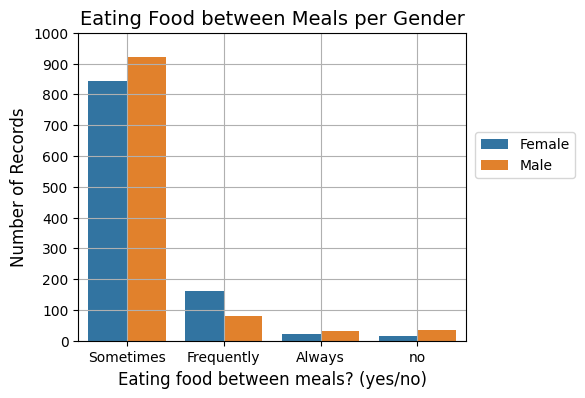

In [33]:
# Define subplot figure
food_bw_meals_1 = plt.figure(figsize=(5,4))

# Food between meals?
food_bw_meals_1 = sns.countplot(data=dataset, x='CAEC', hue='Gender', palette='tab10')
# Adjust Y-Axis axes range(s)
plt.yticks(np.arange(0, 1100, 100))
# Plot title and label(s)
plt.title('Eating Food between Meals per Gender', fontsize=14)
plt.xlabel('Eating food between meals? (yes/no)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.grid(True)

# Show figure
plt.show()

#### How often do you drink alcohol?

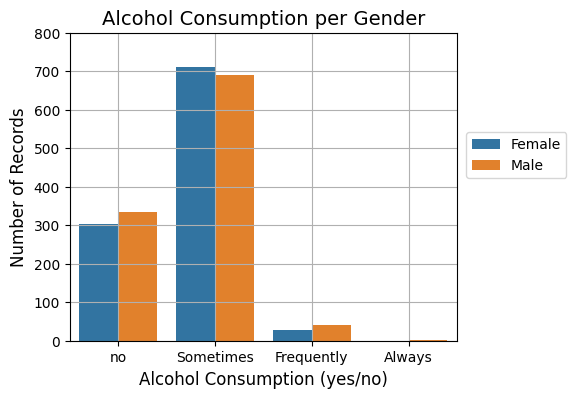

In [34]:
# Define subplot figure
alcohol_1 = plt.figure(figsize=(5,4))

# Drink Alcohol
alcohol_1 = sns.countplot(data=dataset, x='CALC', hue='Gender', palette='tab10')
# Adjust Y-Axis axes range(s)
plt.yticks(np.arange(0, 900, 100))
# Plot title and label(s)
plt.title('Alcohol Consumption per Gender', fontsize=14)
plt.xlabel('Alcohol Consumption (yes/no)', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.grid(True)

# Show figure
plt.show()

#### Which transportation do you usually use?

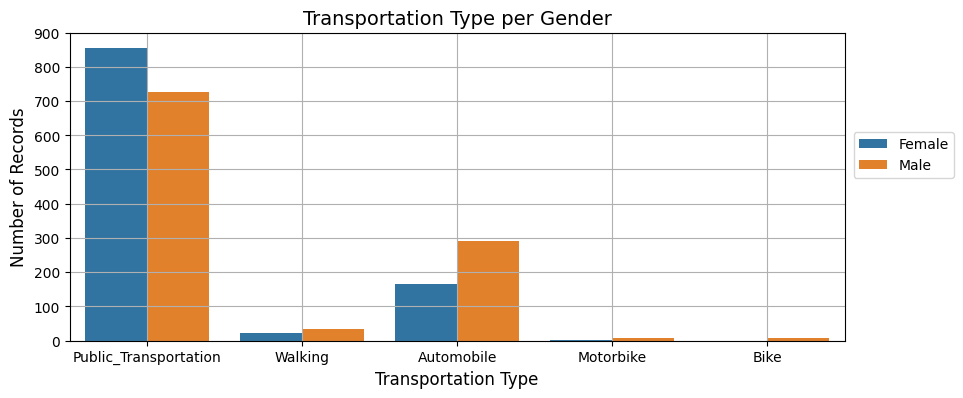

In [35]:
# Define figure
transit_hist_1 = plt.figure(figsize=(10, 4))

# Transportation per gender
transit_hist_1 = sns.countplot(data=dataset, x='MTRANS', hue='Gender', palette='tab10')
# Adjust Y-Axis axes range(s)
plt.yticks(np.arange(0, 1000, 100))
# Plot title and label(s)
plt.title('Transportation Type per Gender', fontsize=14)
plt.xlabel('Transportation Type', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.15, 0.7))
plt.grid(True)

# Show figure
plt.show()

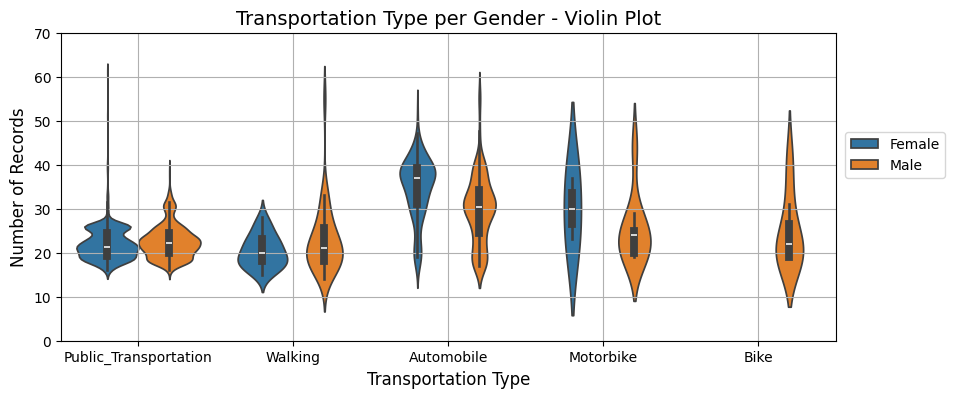

In [36]:
# Define subplot figure
transit_gender_1 = plt.figure(figsize=(10, 4))

# Transportation per gender
transit_gender_1 = sns.violinplot(data=dataset, x='MTRANS', y='Age', hue='Gender',
                                  palette='tab10')
# Adjust Y-Axis axes range(s)
plt.yticks(np.arange(0, 80, 10))
# Plot title and label(s)
plt.title('Transportation Type per Gender - Violin Plot', fontsize=14)
plt.xlabel('Transportation Type', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.15, 0.7))
plt.grid(True)

# Show figure
plt.show()

*No female records indicating using bikes as their main mode of transportation.

#### Obesity Level (dependent variable)

In [37]:
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                 'Obesity_Type_III']

/tmp/ipython-input-869663086.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obesity_level_dist = sns.countplot(data=dataset, x='NObeyesdad', palette='tab10',


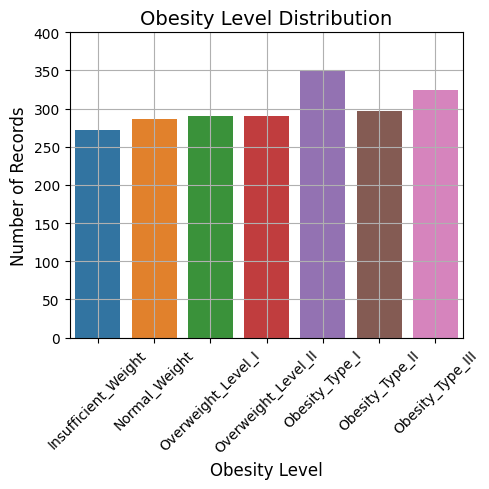

In [38]:
# Define figure
obesity_level_dist = plt.figure(figsize=(5,5))

# Obesity Level - All records
obesity_level_dist = sns.countplot(data=dataset, x='NObeyesdad', palette='tab10',
                                   order=obesity_order, dodge=False)

# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 450, 50))
# Plot title and axes labels
plt.title('Obesity Level Distribution', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

/tmp/ipython-input-2208873514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obesity_level_gender_1 = sns.boxplot(data=dataset, x='NObeyesdad', y='Age',


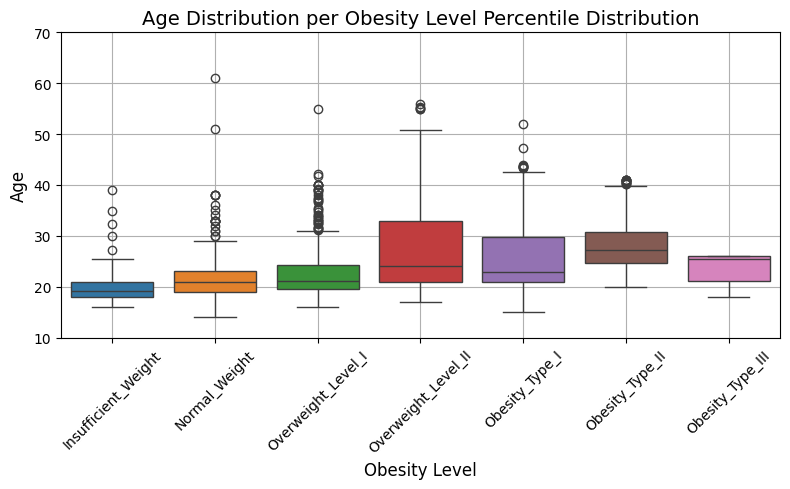

In [39]:
# Define figure
obesity_level_gender_1 = plt.figure(figsize=(8,5))

# Obesity Level
obesity_level_gender_1 = sns.boxplot(data=dataset, x='NObeyesdad', y='Age',
                                     palette='tab10', order=obesity_order)

# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(np.arange(10, 80, 10))
# Plot title and axes labels
plt.title('Age Distribution per Obesity Level Percentile Distribution', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
# Plot grid
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

In [40]:
# Perform a one-way ANOVA test for Obesity Level (dependent variable)

# One-way ANOVA test for each obesity level
f_stat, anova_p_value = f_oneway(dataset[dataset['NObeyesdad'] == 'Insufficient_Weight']['Age'],
                                dataset[dataset['NObeyesdad'] == 'Normal_Weight']['Age'],
                                dataset[dataset['NObeyesdad'] == 'Overweight_Level_I']['Age'],
                                dataset[dataset['NObeyesdad'] == 'Overweight_Level_II']['Age'],
                                dataset[dataset['NObeyesdad'] == 'Obesity_Type_I']['Age'],
                                dataset[dataset['NObeyesdad'] == 'Obesity_Type_II']['Age'],
                                dataset[dataset['NObeyesdad'] == 'Obesity_Type_III']['Age'],
                                equal_var=False
                                )
print("Null Hypothesis (H0)       : No significant difference in average age between obesity levels.")
print("Alternative Hypothesis (H1): There is a significant difference in average age between obesity levels.")
print("")

# Print and interpret results
print("f-value=%.3f, p-value=%.3f, significance level=%.2f" % (f_stat, anova_p_value, alpha))
if (anova_p_value < alpha):
    print('Reject Null Hypothesis (H0)')
else:
    print('Fail to Reject Null Hypothesis (H0)')

Null Hypothesis (H0)       : No significant difference in average age between obesity levels.
Alternative Hypothesis (H1): There is a significant difference in average age between obesity levels.

f-value=147.166, p-value=0.000, significance level=0.05
Reject Null Hypothesis (H0)


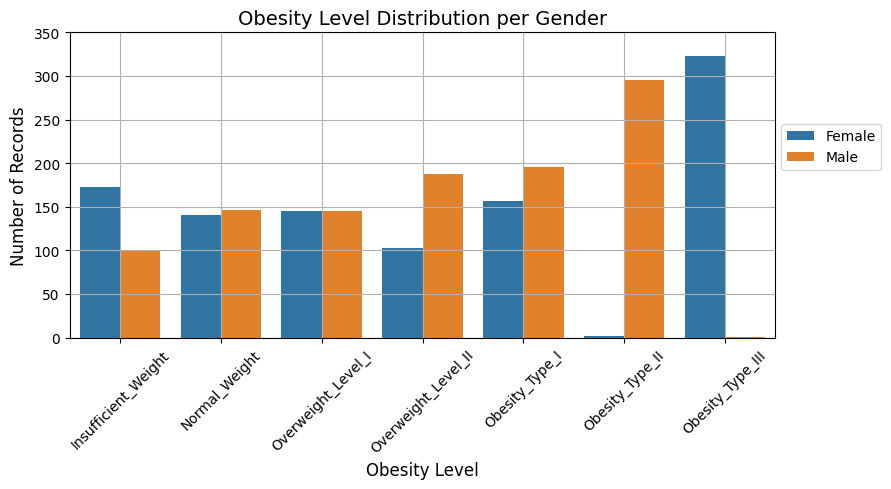

In [41]:
# Define figure
obesity_level_gender_2 = plt.figure(figsize=(9,5))

# Obesity Level - All records per gender
obesity_level_gender_2 = sns.countplot(data=dataset, x='NObeyesdad', hue='Gender',
                                   order=obesity_order)

# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 400, 50))
# Plot title and axes labels
plt.title('Obesity Level Distribution per Gender', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
# Plot legend and grid
plt.legend(labels=['Female', 'Male'], bbox_to_anchor=(1.15, 0.7), borderaxespad=0)
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

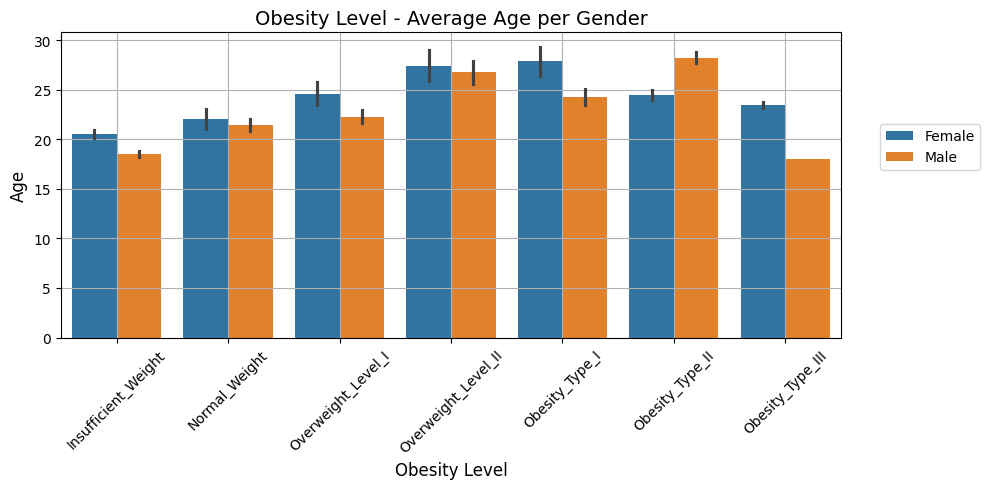

In [42]:
# Define figure
obesity_level_gender_3 = plt.figure(figsize=(10,5))

# Obesity Level - Average age per gender
obesity_level_gender_3 = sns.barplot(data=dataset, x='NObeyesdad', y='Age',
                                     hue='Gender', palette='tab10',
                                     order=obesity_order)
# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 35, 5))
# Plot title and axes labels
plt.title('Obesity Level - Average Age per Gender', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.05, 0.7), borderaxespad=0)
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

*NOTE: Black bar lines refer to a 95% confidence interval.

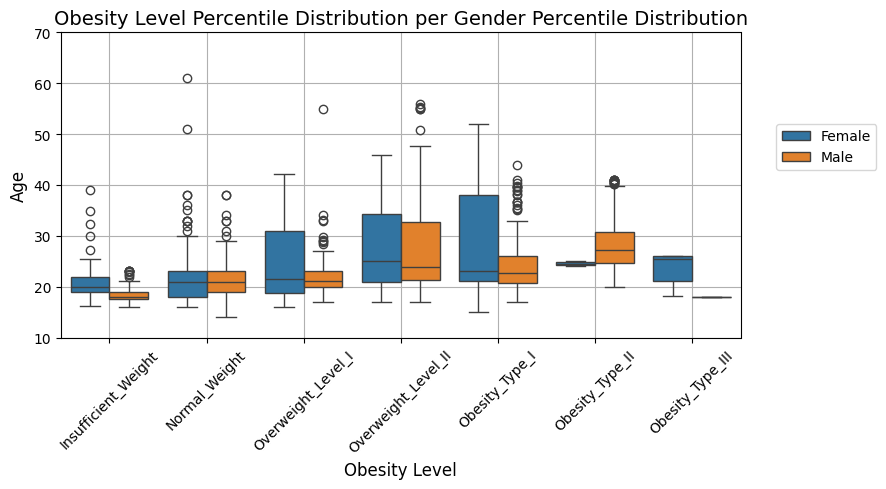

In [43]:
# Define figure
obesity_level_gender_4 = plt.figure(figsize=(9,5))

# Obesity Level - per gender and age - percentile distribution
obesity_level_gender_4 = sns.boxplot(data=dataset, x='NObeyesdad', y='Age',
                                     hue='Gender', palette='tab10',
                                     order=obesity_order)
# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(np.arange(10, 80, 10))
# Plot title and axes labels
plt.title('Obesity Level Percentile Distribution per Gender Percentile Distribution', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.2, 0.7), borderaxespad=0)
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

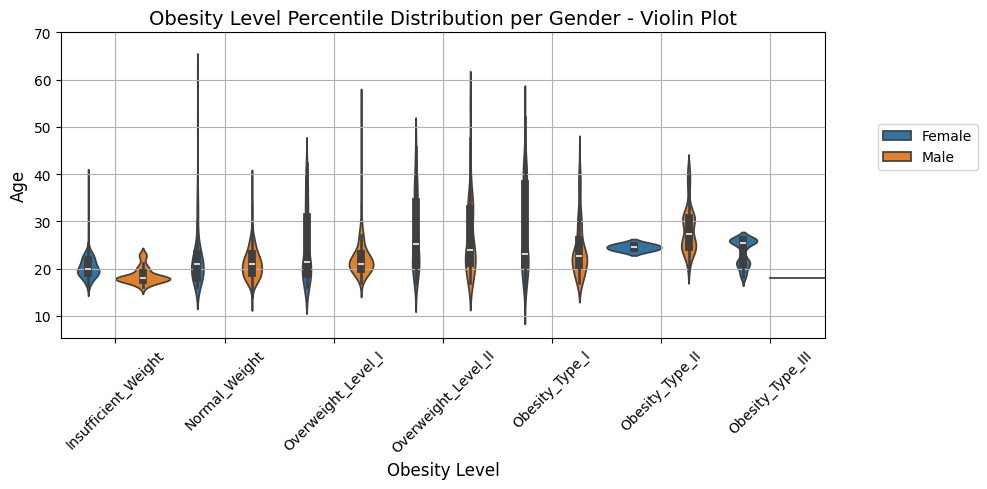

In [44]:
# Define figure
obesity_level_gender_violin = plt.figure(figsize=(10,5))

# Obesity Level - per gender and age - Violin Plot
obesity_level_gender_violin = sns.violinplot(data=dataset, x='NObeyesdad',
                                             y='Age', hue='Gender', width=1,
                                             order=obesity_order)
# Adjust X and Y-Axes
plt.xticks(rotation=45)
plt.yticks(np.arange(10, 80, 10))
# Plot title and axes labels
plt.title('Obesity Level Percentile Distribution per Gender - Violin Plot', fontsize=14)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
# Plot legend and grid
plt.legend(bbox_to_anchor=(1.2, 0.7), borderaxespad=0)
plt.grid(True)

# Tight layout
plt.tight_layout()

# Show figure
plt.show()

## 4. Prepare Data for Modelling

### 4.1. Select features

In [45]:
# Re-organize dataframe
df = dataset[[
              'Gender',
              'Age',
              'Height',
              'Weight',
              'family_history_with_overweight',
              'FAVC',
              'FCVC',
              # 'NCP',
              'CAEC',
              # 'SMOKE',
              'CH2O',
              # 'SCC',
              'FAF',
              # 'TUE',
              'CALC',
              'MTRANS',
              'NObeyesdad'
            ]]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   CH2O                            2111 non-null   float64
 9   FAF                             2111 non-null   float64
 10  CALC                            2111 non-null   object 
 11  MTRANS                          2111 non-null   object 
 12  NObeyesdad                      21

#### Select matrix of features (X) and dependent variable (y)

In [47]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(2111, 12) (2111,)


#### 4.2. Label Encode categorical fields

In [48]:
# All features
le = LabelEncoder()
le_columns = [0, 4, 5, 7, 8, 10, 11]
# le_columns = [0, 4, 8]
# Apply Label Encoding
for i in le_columns:
  X[:, i] = le.fit_transform(X[:, i])

# Label Encode the Dependent Variable
y = le.fit_transform(y)

# Print results
print(X[:, 0:14])
print(y)

[[0 21.0 1.62 ... 0.0 3 3]
 [0 21.0 1.52 ... 3.0 2 3]
 [1 23.0 1.8 ... 2.0 1 3]
 ...
 [0 22.524036 1.752206 ... 1.414209 2 3]
 [0 24.361936 1.73945 ... 1.139107 2 3]
 [0 23.664709 1.738836 ... 1.026452 2 3]]
[1 1 1 ... 4 4 4]


In [49]:
# # Reduced
# le = LabelEncoder()
# le_columns = [0, 5]

# # Apply Label Encoding
# for i in le_columns:
#   X[:, i] = le.fit_transform(X[:, i])

# # Label Encode the Dependent Variable
# y = le.fit_transform(y)

# # Print results
# print(X[:, 0:6])
# print(y)

###### Dependent Variable Encoded Labels and Respective Classes:

0.   Insufficent Weight
1.   Normal Weight
2.   Obesity Type I
3.   Obesity Type II
4.   Obesity Type III
5.   Overweight Level I
6.   Overweight Level II

### 4.3. Split dataset into training and test sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1688, 12) (1688,)
(423, 12) (423,)


### 4.4. Count number of records per dependent variable category

In [51]:
# Unique dependent variable labels (categories/classes)
set_y = np.unique(y_test)
set_y

array([0, 1, 2, 3, 4, 5, 6])

In [52]:
# Create Pandas dataframe for record counting
num_records = [[0, 'Insufficient_Weight'],
              [1, 'Normal_Weight'],
              [2, 'Obesity_Type_I'],
              [3, 'Obesity_Type_II'],
              [4, 'Obesity_Type_III'],
              [5, 'Overweight_I'],
              [6, 'Overweight_II']]
df_num_records = pd.DataFrame(num_records, columns=['Label', 'Category'])
# Count total number of records per category in test dataset (y_test)
y_test_records = dict(Counter(y_test).items())
y_test_records = dict(sorted(y_test_records.items()))

# Convert all observations to Pandas dataframe
df_num_records_values = pd.DataFrame(y_test_records.values(), columns=['Total'])
# Concatenate with records dataframe
df_num_records = pd.concat([df_num_records, df_num_records_values], axis=1)

df_num_records

Label             Category  Total
0      0  Insufficient_Weight     56
1      1        Normal_Weight     62
2      2       Obesity_Type_I     78
3      3      Obesity_Type_II     58
4      4     Obesity_Type_III     63
5      5         Overweight_I     56
6      6        Overweight_II     50

### 4.5. Feature Scaling

In [53]:
# Perform Standardization (compute z-score)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Build and Evaluate Machine Learning Models

In [54]:
# Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
# K-Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Support Vector Machine - Classification (SVC)
from sklearn.svm import SVC
# Decision Tree (DT)
from sklearn.tree import DecisionTreeClassifier
# Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier
# XGBoost (XGB)
import xgboost as xgb
from xgboost import XGBClassifier
# LightGBM (LGB)
import lightgbm as lgb
from lightgbm import LGBMClassifier
# Deep Neural Network (DNN)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Additional Libraries
import shap
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [55]:
# Plot confusion matrix
def plot_confusion_matrix(model, X_text=X_test, y_test=y_test):
  """
  model  - ML model, predicted results
  X_test - Matrix of features for test set
  y_test - Dependent (target) variable for test set
  """

  # Define confusion matrix figure
  cm = plt.figure(figsize=(7,7))

  # Plot the confusion matrix as heatmap
  cm = confusion_matrix(model, y_test)
  sns.heatmap(cm, annot=True)
  # Get number of predicted records per class (category)
  diag = cm.diagonal()
  # Plot title and axes labels
  plt.title('Confusion Matrix', fontsize=14)
  plt.xlabel('Actual Class', fontsize=12)
  plt.ylabel('Predicted Class', fontsize=12)

  # Return figure - to show
  return cm, diag

In [56]:
# Plot ROC curve
def plot_roc_curve(model, y_test, colour):
  """
  model  - Prediction model
  y_test - Dependent variable (test set)
  colour - Plot colour
  """

  # Define figure
  fig = plt.figure(figsize=(5,5))

  # fpr - False Positive Rate
  # tpr - True Positive Rate
  fpr, tpr, _ = roc_curve(y_test, model)
  # auc - Area Under Curve
  auc = roc_auc_score(y_test, model)
  fig = plt.plot(fpr, tpr, color=colour, label="FPR vs. TPR., AUC: " + str(auc))
  # Plot title and labels
  plt.title("ROC Curve", fontsize=14)
  plt.xlabel("False Positive Rate (FPR)", fontsize=12)
  plt.ylabel("True Positive Rate (TPR)", fontsize=12)
  # Plot legend and grid
  plt.legend(loc="lower right")
  plt.grid(True)

  return fig

In [57]:
# Apply k-Fold Cross Validation on the training set
def k_fold(model, n=10):
  """
  model - Machine Learning model implemented
  n     - number of k-Folds (default 10)
  """

  # Accuracy Scoring
  accuracy_means, accuracy_stds, accuracy_mins, accuracy_maxs = [], [], [], []
  # Cross validate for n k-folds (RepeatedStratifiedKFold - 3 repeats each)
  for i in range(2, 2+n):
    cv = RepeatedStratifiedKFold(n_splits=i, n_repeats=3, random_state=42)
    # Collect appropriate metric results per k-Fold
    accuracy_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

    # Force scores to be positive
    accuracy_scores = abs(accuracy_scores)

    # Append Accuracy scores
    accuracy_means.append(np.mean(accuracy_scores))
    accuracy_stds.append(np.std(accuracy_scores))
    accuracy_mins.append(np.min(accuracy_scores))
    accuracy_maxs.append(np.max(accuracy_scores))

  # Define subplot figure
  k_fold_results = plt.figure(figsize=(9, 4))
  k_fold_results.suptitle('k-Fold Cross Validation Results', fontsize=14)
  k_fold_results.supxlabel('k-Fold', fontsize=12)

  # Plot Accuracy scores per k-fold:
  ax1 = k_fold_results.add_subplot(1, 2, 1)
  ax1.plot(np.arange(1,1+n), accuracy_means, color='red')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax1.set_ylabel('Accuracy ', fontsize=12)
  ax1.set_title('Accuracy per k-Fold', fontsize=14)
  # Plot grid
  ax1.grid(True)

  # Plot Accuracy Standard Deviations per k-fold:
  ax2 = k_fold_results.add_subplot(1, 2, 2)
  ax2.plot(np.arange(1,1+n), accuracy_stds, color='red')
  # Adjust X-Axis range
  plt.xticks(np.arange(0, 11, 1))
  # Plot title and label(s)
  ax2.set_ylabel('Standard Deviation', fontsize=12)
  ax2.set_title('Accuracy Standard Deviation per k-Fold', fontsize=14)
  # Plot grid
  ax2.grid(True)

  # Tight layout
  plt.tight_layout()

  # Show subplot
  plt.show()

  # Return cv object for Grid Searching hyperparameter tuning (optimization)
  return cv

### 5.1. Machine Learning (ML) Models

*NOTE: In order to minimize script run-time

- All SHAP value results per model was commented out. Please refer to the README file for the most-relevant features.
- For each model (except KNN), the optimal hyperparameter values were already implemented during training.

#### 5.1.1. K-Nearest Neighbours (KNN)

In [58]:
# Start KNN model run time
knn_start_time = time.time()

In [59]:
# Identify optimal hyperparameters via GridSearch
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10)

In [60]:
# Define KNN model
# knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf = make_pipeline(knn_grid)

# Train KNN model
knn_clf.fit(X_train, y_train)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10]}))])

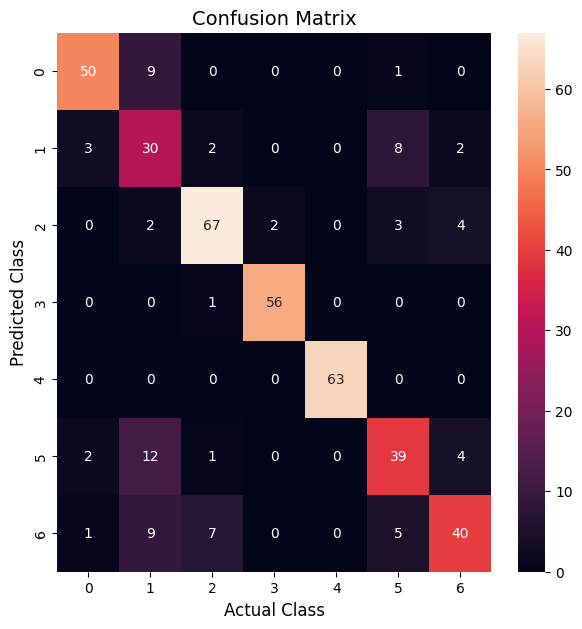


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        56
           1       0.67      0.48      0.56        62
           2       0.86      0.86      0.86        78
           3       0.98      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.67      0.70      0.68        56
           6       0.65      0.80      0.71        50

    accuracy                           0.82       423
   macro avg       0.81      0.81      0.81       423
weighted avg       0.82      0.82      0.81       423



In [61]:
# Predict KNN results
knn_pred = knn_clf.predict(X_test)

# print('dt_pred: y_test:')
# print(np.concatenate((dt_pred.reshape(len(dt_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Plot the confusion matrix
knn_cm, knn_records = plot_confusion_matrix(knn_pred, X_test, y_test)
plt.show()

# TP - True Positive
# TN - True Negative
# FP - False Positive (Type I Error)
# FN - False Negative (Type II Error)

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of records of each class in predicted model

# Print Classification Report (brief summary of results)
print('')
print('Classification Report: ')
print(classification_report(y_test, knn_pred))

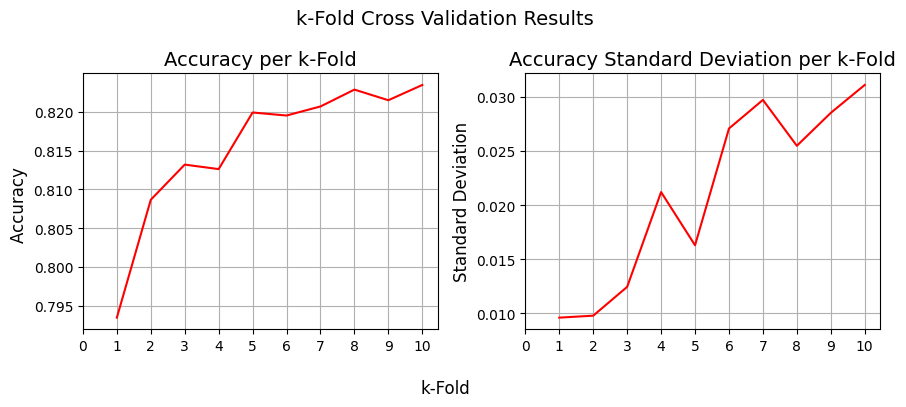

RepeatedStratifiedKFold(n_repeats=3, n_splits=11, random_state=42)

In [62]:
# Perform k-Fold Cross Validation
k_fold(knn_clf, 10)

In [63]:
# Count number of records in KNN predictions per category

# Add values to list
knn_records_list = pd.DataFrame(knn_records, columns=['KNN'])
# Concatenate with records dataframe
df_num_records = pd.concat([df_num_records, knn_records_list], axis=1)

df_num_records

Label             Category  Total  KNN
0      0  Insufficient_Weight     56   50
1      1        Normal_Weight     62   30
2      2       Obesity_Type_I     78   67
3      3      Obesity_Type_II     58   56
4      4     Obesity_Type_III     63   63
5      5         Overweight_I     56   39
6      6        Overweight_II     50   40

In [64]:
# # KNN SHAP Value
# knn_explainer = shap.KernelExplainer(knn_clf.predict, shap.kmeans(X_train, 50))
# knn_shap_values = knn_explainer.shap_values(X_test)

# # Plot SHAP values per feature
# knn_shap_plot = shap.summary_plot(knn_shap_values, X_test)

# # Show plot
# plt.show()

In [65]:
# Calculate KNN model run time
knn_hours, knn_minutes, knn_seconds = run_time(knn_start_time)
print('KNN run time (h:mm:ss): ' + str(knn_hours) + ':' + str(knn_minutes) +
      ':' + str(knn_seconds))

KNN run time (h:mm:ss): 0:2:40


#### 5.1.2. Support Vector Machine - Classification (SVC)

In [66]:
# Start SVC model run time
svc_start_time = time.time()

In [67]:
# Identify optimal hyperparameters via GridSearch
svc_params = {'kernel': ['linear'],
              'C' : [100],
              # 'C' : [10, 100]
              }

svc_grid = GridSearchCV(SVC(), svc_params, cv=10)

In [68]:
# Define SVC model
svc_clf = SVC(kernel='linear', C=100)
# svc_clf = make_pipeline(svc_grid)

# Train SVC model
svc_clf.fit(X_train, y_train)

SVC(C=100, kernel='linear')

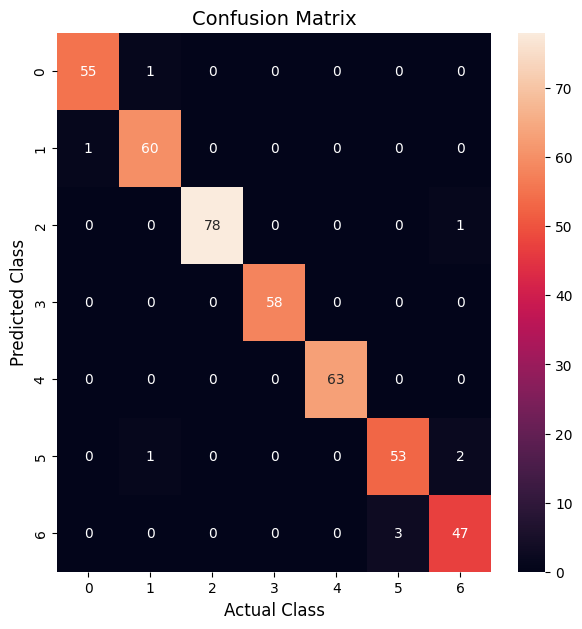


Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.98      0.97      0.98        62
           2       0.99      1.00      0.99        78
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        63
           5       0.95      0.95      0.95        56
           6       0.94      0.94      0.94        50

    accuracy                           0.98       423
   macro avg       0.98      0.98      0.98       423
weighted avg       0.98      0.98      0.98       423



In [69]:
# Predict SVC results
svc_pred = svc_clf.predict(X_test)

# print('dt_pred: y_test:')
# print(np.concatenate((dt_pred.reshape(len(svc_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Plot the confusion matrix
svc_cm, svc_records = plot_confusion_matrix(svc_pred, X_test, y_test)
plt.show()

# TP - True Positive
# TN - True Negative
# FP - False Positive (Type I Error)
# FN - False Negative (Type II Error)

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of records of each class in predicted model

# Print Classification Report (brief summary of results)
print('')
print('Classification Report: ')
print(classification_report(y_test, svc_pred))

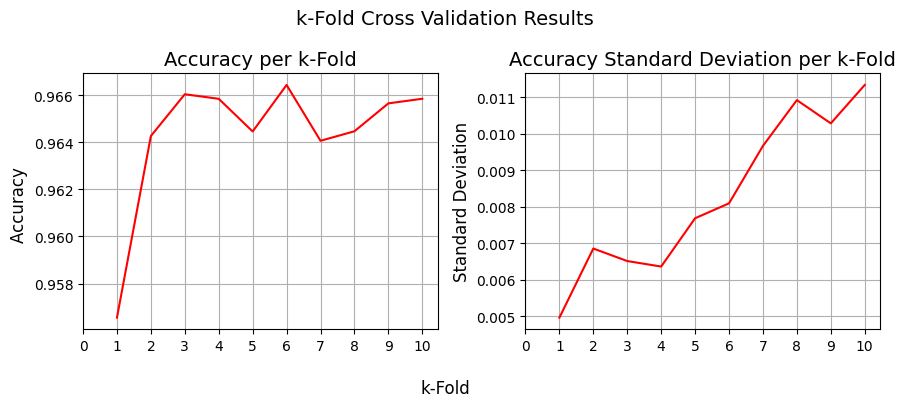

RepeatedStratifiedKFold(n_repeats=3, n_splits=11, random_state=42)

In [70]:
# Perform k-Fold Cross Validation
k_fold(svc_clf, 10)

In [71]:
# Count number of records in SVC predictions per category

# Add values to list
svc_records_list = pd.DataFrame(svc_records, columns=['SVC'])
# Concatenate with records dataframe
df_num_records = pd.concat([df_num_records, svc_records_list], axis=1)

df_num_records

Label             Category  Total  KNN  SVC
0      0  Insufficient_Weight     56   50   55
1      1        Normal_Weight     62   30   60
2      2       Obesity_Type_I     78   67   78
3      3      Obesity_Type_II     58   56   58
4      4     Obesity_Type_III     63   63   63
5      5         Overweight_I     56   39   53
6      6        Overweight_II     50   40   47

In [72]:
# # SVC SHAP Values
# svc_shap_explainer = shap.KernelExplainer(svc_clf.predict, shap.kmeans(X_train, 50))
# svc_shap_values = svc_shap_explainer.shap_values(X_test)

# # Plot SHAP values per feature
# svc_shap_plot = shap.summary_plot(svc_shap_values, X_test)

# # Show plot
# plt.show()

In [73]:
# Calculate SVC model run time
svc_hours, svc_minutes, svc_seconds = run_time(svc_start_time)
print('SVC run time (h:mm:ss): ' + str(svc_hours) + ':' + str(svc_minutes) +
      ':' + str(svc_seconds))

SVC run time (h:mm:ss): 0:0:55


#### 5.1.3. Random Forest (RF)

In [74]:
# Start RF model run time
rf_start_time = time.time()

In [75]:
# Identify optimal hyperparameters via GridSearch
rf_params = {'random_state': [42],
             'n_estimators': [100, 150, 200, 250],
             'max_depth': [2, 4, 6, 8, 10]}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=10)

In [76]:
# Define RF model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
# rf_clf = make_pipeline(rf_grid)

# Train RF model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

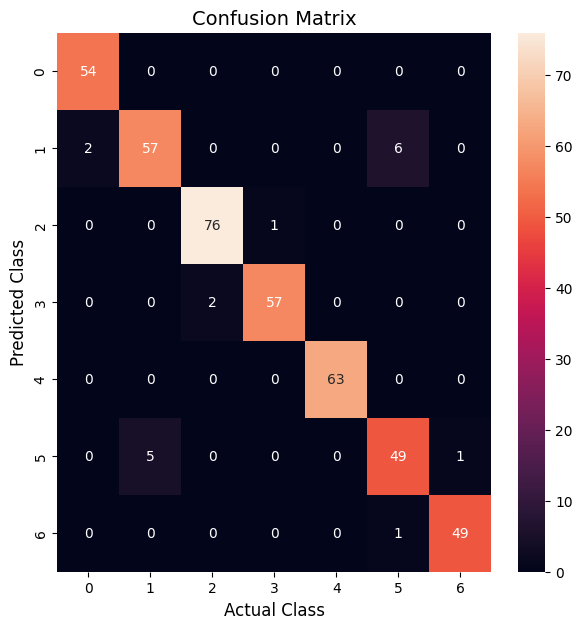


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.92      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.89      0.88      0.88        56
           6       0.98      0.98      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [77]:
# Predict RF results
rf_pred = rf_clf.predict(X_test)

# print('rf_pred: y_test:')
# print(np.concatenate((rf_pred.reshape(len(rf_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Plot the confusion matrix
rf_cm, rf_records = plot_confusion_matrix(rf_pred, X_test, y_test)
plt.show()

# TP - True Positive
# TN - True Negative
# FP - False Positive (Type I Error)
# FN - False Negative (Type II Error)

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of records of each class in predicted model

# Print Classification Report (brief summary of results)
print('')
print('Classification Report: ')
print(classification_report(y_test, rf_pred))

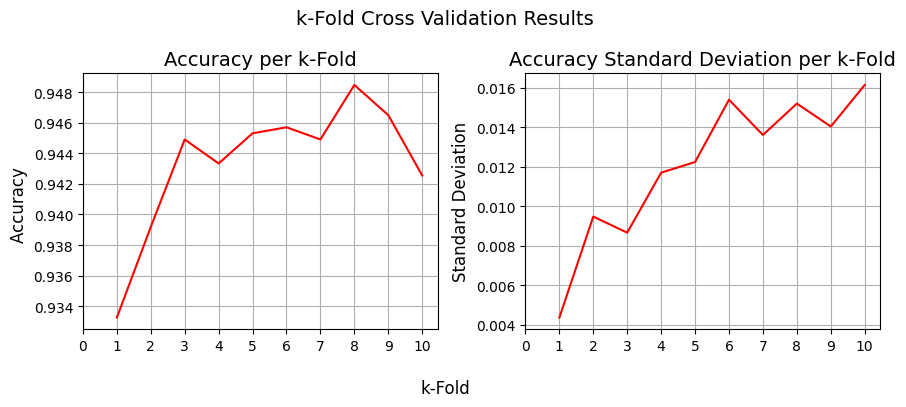

RepeatedStratifiedKFold(n_repeats=3, n_splits=11, random_state=42)

In [78]:
# Perform k-Fold Cross Validation
k_fold(rf_clf, 10)

In [79]:
# Count number of records in RF predictions per category

# Add values to list
rf_records_list = pd.DataFrame(rf_records, columns=['RF'])
# Concatenate with records dataframe
df_num_records = pd.concat([df_num_records, rf_records_list], axis=1)

df_num_records

Label             Category  Total  KNN  SVC  RF
0      0  Insufficient_Weight     56   50   55  54
1      1        Normal_Weight     62   30   60  57
2      2       Obesity_Type_I     78   67   78  76
3      3      Obesity_Type_II     58   56   58  57
4      4     Obesity_Type_III     63   63   63  63
5      5         Overweight_I     56   39   53  49
6      6        Overweight_II     50   40   47  49

In [80]:
# # RF SHAP Values
# rf_shap_explainer = shap.KernelExplainer(rf_clf.predict, shap.kmeans(X_train, 50))
# rf_shap_values = rf_shap_explainer.shap_values(X_test)

# # Plot SHAP values per feature
# rf_shap_plot = shap.summary_plot(rf_shap_values, X_test)

# # Show plot
# plt.show()

In [81]:
# Calculate RF model run time
rf_hours, rf_minutes, rf_seconds = run_time(rf_start_time)
print('RF run time (h:mm:ss): ' + str(rf_hours) + ':' + str(rf_minutes) +
      ':' + str(rf_seconds))

RF run time (h:mm:ss): 0:1:8


#### 5.1.4. XGBoost (XGB)

In [82]:
# Start XGB model run time
xgb_start_time = time.time()

In [83]:
# Identify optimal hyperparameters via GridSearch
xgb_params = {'random_state': [42],
              'n_estimators': [100, 150, 200, 250],
              'max_depth': [2, 4, 6, 8, 10]}

xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=10)

In [84]:
# Define XGBoost model
xgb_clf = XGBClassifier(random_state=42, n_estimators=100, max_depth=4)
# xgb_clf = make_pipeline(xgb_grid)

# Train XGB model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

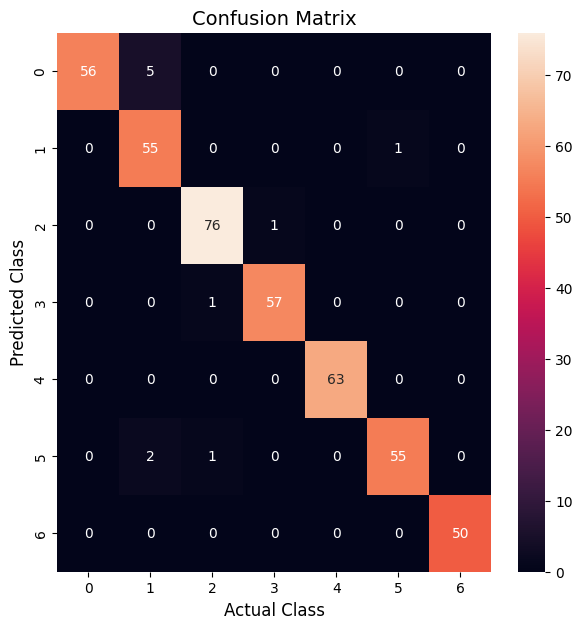


Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.98      0.89      0.93        62
           2       0.99      0.97      0.98        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.95      0.98      0.96        56
           6       1.00      1.00      1.00        50

    accuracy                           0.97       423
   macro avg       0.97      0.98      0.97       423
weighted avg       0.97      0.97      0.97       423



In [85]:
# Predict XGB results
xgb_pred = xgb_clf.predict(X_test)

# print('xgb_pred: y_test:')
# print(np.concatenate((xgb_pred.reshape(len(xgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Plot the confusion matrix
xgb_cm, xgb_records = plot_confusion_matrix(xgb_pred, X_test, y_test)
plt.show()

# TP - True Positive
# TN - True Negative
# FP - False Positive (Type I Error)
# FN - False Negative (Type II Error)

# accuracy = (TP + TN)/(TN + FP + FN + TP)
# precision = TP/(TP + FP)
# recall = TP/(TP + FN)
# f1_score = (2 * precision * recall)/(precision + recall)
# support = Number of records of each class in predicted model

# Print Classification Report (brief summary of results)
print('')
print('Classification Report: ')
print(classification_report(y_test, xgb_pred))

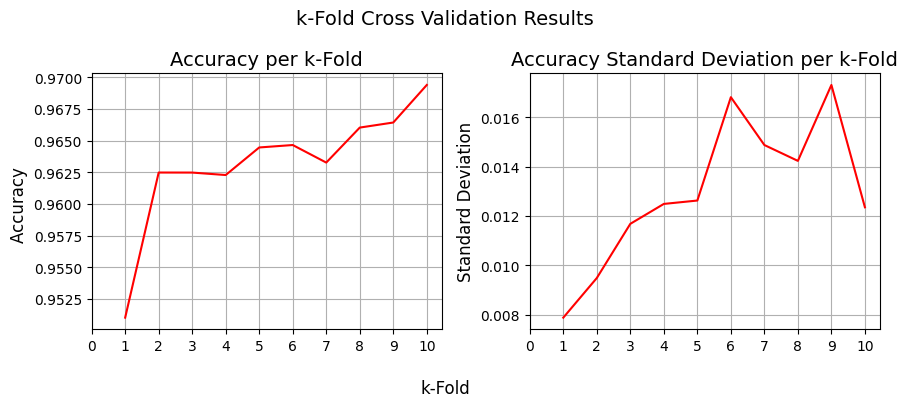

RepeatedStratifiedKFold(n_repeats=3, n_splits=11, random_state=42)

In [86]:
# Perform k-Fold Cross Validation
k_fold(xgb_clf, 10)

In [87]:
# Count number of records in XGB predictions per category

# Add values to list
xgb_records_list = pd.DataFrame(xgb_records, columns=['XGB'])
# Concatenate with records dataframe
df_num_records = pd.concat([df_num_records, xgb_records_list], axis=1)

df_num_records

Label             Category  Total  KNN  SVC  RF  XGB
0      0  Insufficient_Weight     56   50   55  54   56
1      1        Normal_Weight     62   30   60  57   55
2      2       Obesity_Type_I     78   67   78  76   76
3      3      Obesity_Type_II     58   56   58  57   57
4      4     Obesity_Type_III     63   63   63  63   63
5      5         Overweight_I     56   39   53  49   55
6      6        Overweight_II     50   40   47  49   50

In [88]:
# # XGB SHAP Values
# xgb_shap_explainer = shap.KernelExplainer(xgb_clf.predict, shap.kmeans(X_train, 50))
# xgb_shap_values = xgb_shap_explainer.shap_values(X_test)

# # Plot SHAP values per feature
# xgb_shap_plot = shap.summary_plot(xgb_shap_values, X_test)

# # Show plot
# plt.show()

In [89]:
# Calculate XGB model run time
xgb_hours, xgb_minutes, xgb_seconds = run_time(xgb_start_time)
print('XGB run time (h:mm:ss): ' + str(xgb_hours) + ':' + str(xgb_minutes) +
      ':' + str(xgb_seconds))

XGB run time (h:mm:ss): 0:0:49


### 5.2. Calculate Model Run-Times and Classification Results

In [90]:
print("Model Run-Times (h:mm:ss) and Accuracy results: \n")

# KNN
print('KNN - ' + str(knn_hours) + ':' + str(knn_minutes) + ':' + str(knn_seconds)
  + ", Accuracy: " + str(round(accuracy_score(y_test, knn_pred)*100, 2)) + "%")
# SVC
print('SVC - ' + str(svc_hours) + ':' + str(svc_minutes) + ':' + str(svc_seconds)
  + ", Accuracy: " + str(round(accuracy_score(y_test, svc_pred)*100, 2)) + "%")
# RF
print('RF - ' + str(rf_hours) + ':' + str(rf_minutes) + ':' + str(rf_seconds)
  + ", Accuracy: " + str(round(accuracy_score(y_test, rf_pred)*100, 2)) + "%")
# XGB
print('XGB - ' + str(xgb_hours) + ':' + str(xgb_minutes) + ':' + str(xgb_seconds)
  + ", Accuracy: " + str(round(accuracy_score(y_test, xgb_pred)*100, 2)) + "%")

Model Run-Times (h:mm:ss) and Accuracy results: 

KNN - 0:2:40, Accuracy: 81.56%
SVC - 0:0:55, Accuracy: 97.87%
RF - 0:1:8, Accuracy: 95.74%
XGB - 0:0:49, Accuracy: 97.4%


In [91]:
# Results per each model
df_num_records

Label             Category  Total  KNN  SVC  RF  XGB
0      0  Insufficient_Weight     56   50   55  54   56
1      1        Normal_Weight     62   30   60  57   55
2      2       Obesity_Type_I     78   67   78  76   76
3      3      Obesity_Type_II     58   56   58  57   57
4      4     Obesity_Type_III     63   63   63  63   63
5      5         Overweight_I     56   39   53  49   55
6      6        Overweight_II     50   40   47  49   50

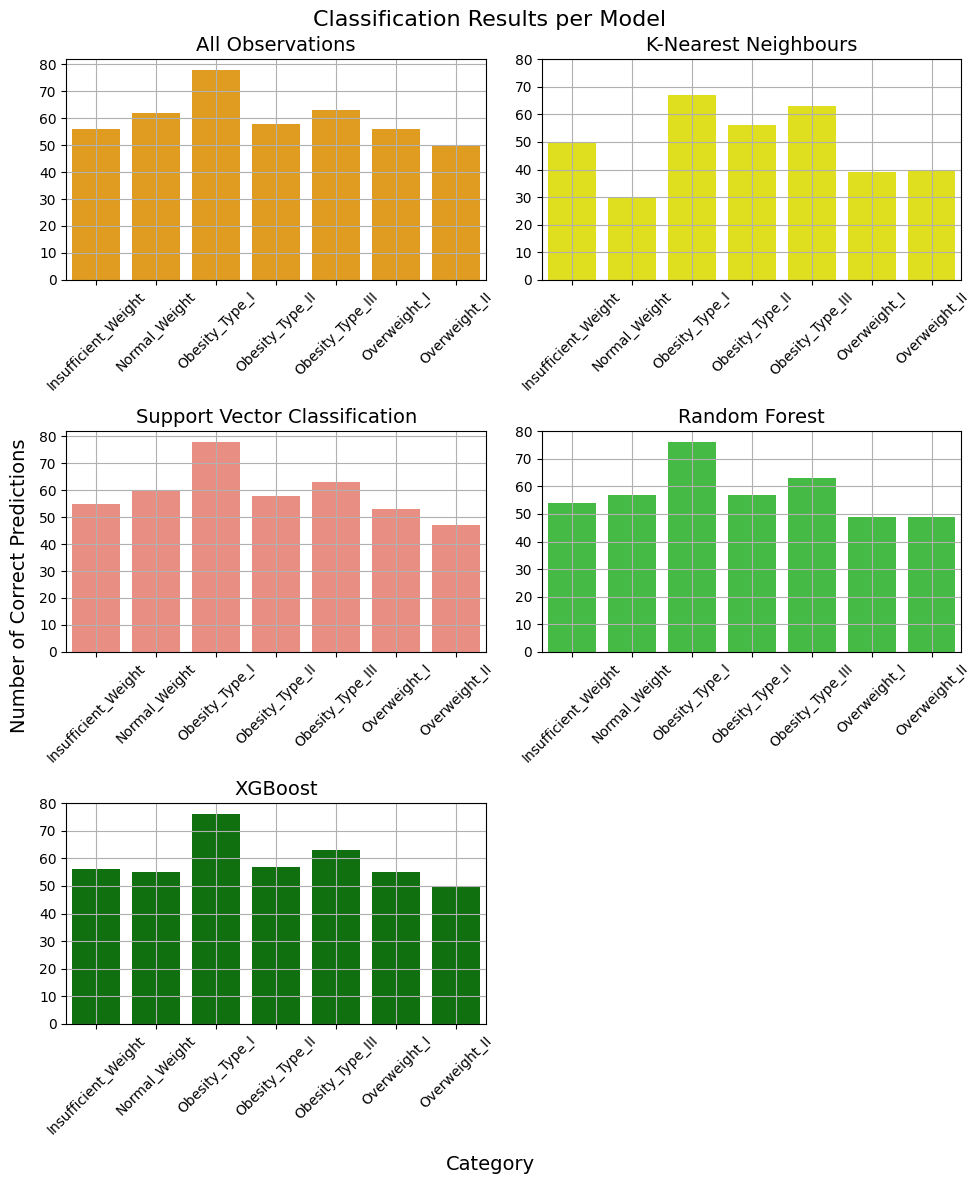

In [92]:
# Plot results
clf_model_results = plt.figure(figsize=(10, 12))

# Overall title and labels
clf_model_results.suptitle('Classification Results per Model', fontsize=16)
clf_model_results.supxlabel('Category', fontsize=14)
clf_model_results.supylabel('Number of Correct Predictions', fontsize=14)

# All Categories
ax1 = clf_model_results.add_subplot(3, 2, 1)
ax1 = sns.barplot(data=df_num_records, x='Category', y='Total', color='orange')
# Adjust X-Axis labels
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 90, 10))
# Plot title and grid
plt.title("All Observations", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.grid(True)

# Correct predictions - KNN model
ax2 = clf_model_results.add_subplot(3, 2, 2)
ax2 = sns.barplot(data=df_num_records, x='Category', y='KNN', color='yellow')
# Adjust X-Axis labels
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 90, 10))
# Plot title and grid
plt.title("K-Nearest Neighbours", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.grid(True)

# Correct predictions - SVC model
ax3 = clf_model_results.add_subplot(3, 2, 3)
ax3 = sns.barplot(data=df_num_records, x='Category', y='SVC', color='salmon')
# Adjust X-Axis labels
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 90, 10))
# Plot title and grid
plt.title("Support Vector Classification", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.grid(True)

# Correct predictions - RF model
ax4 = clf_model_results.add_subplot(3, 2, 4)
ax4 = sns.barplot(data=df_num_records, x='Category', y='RF', color='limegreen')
# Adjust X-Axis labels
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 90, 10))
# Plot title and grid
plt.title("Random Forest", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.grid(True)

# Correct predictions - XGB model
ax5 = clf_model_results.add_subplot(3, 2, 5)
ax5 = sns.barplot(data=df_num_records, x='Category', y='XGB', color='green')
# Adjust X-Axis labels
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 90, 10))
# Plot title and grid
plt.title("XGBoost", fontsize=14)
plt.xlabel("")
plt.ylabel("")
plt.grid(True)

# Tight layout
plt.tight_layout()

plt.show()

### Calculate Script Run-Time

In [93]:
# Calculate script run time
script_hours, script_minutes, script_seconds = run_time(script_start_time)
print('Script run time (h:mm:ss): ' + str(script_hours) + ':' + str(script_minutes)
  + ':' + str(script_seconds))

Script run time (h:mm:ss): 0:6:34
